# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

In [1]:
# The business objective is to identify the key factors influencing used car prices.

In [3]:
# To acheive this, We will build a predictive model where the target variable is the price of a used car.
# The goal is to analyze the relationships between the car's price and various features given in the dataset.

In [5]:
# Using the Machine Learning techniques learnt so far, we need to Quantify the contribution of each feature to the car's price.

In [7]:
# Identify patterns and trends in the dataset that highlight what consumers value most in a used car.

In [9]:
# This will require the following tasks 
# Data preparation i.e. removing outliers, handling missing values and encoding
# Exploratory data analysis thru different visializations of the data and relationships
# Regression modeling to extract meaningful insights and make reliable predictions

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [11]:
#  Importing libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_selection import SequentialFeatureSelector, SelectFromModel
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler, PolynomialFeatures, MinMaxScaler, OrdinalEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn import set_config
set_config(display="diagram")
import warnings
warnings.filterwarnings('ignore')

In [13]:
# loading the used car sales data
car_data = pd.read_csv("data/vehicles.csv")

In [15]:
# Reviewing the first 5 rows of data to get a look at the quality of data
car_data.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [17]:
# Displaying the structure of dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [19]:
# Observation-1: The dataset has 4 numerical features and 14 categorical features

In [21]:
# Looking for missing/null values in data 
car_data.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [23]:
# Identify the precentage of values missing in each column
print( "\nPercent of missing :\n\n", round(car_data.isna().sum() / car_data.isna().count() * 100, 2))


Percent of missing :

 id               0.00
region           0.00
price            0.00
year             0.28
manufacturer     4.13
model            1.24
condition       40.79
cylinders       41.62
fuel             0.71
odometer         1.03
title_status     1.93
transmission     0.60
VIN             37.73
drive           30.59
size            71.77
type            21.75
paint_color     30.50
state            0.00
dtype: float64


In [25]:
# Observation-2: There are quitea few null values. Size has 71% null values, Condition and Cylinders have over 40%

In [27]:
# Reviewing the summary statistics of the data (Transpose the table for better readability)
car_data.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
id,426880.0,NaN,NaN,NaN,7311486634.22,4473170.41,7207408119.0,7308143339.25,7312620821.0,7315253543.5,7317101084.0
region,426880,404,columbus,3608,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,426880.0,NaN,NaN,NaN,75199.03,12182282.17,0.0,5900.0,13950.0,26485.75,3736928711.0
year,425675.0,NaN,NaN,NaN,2011.24,9.45,1900.0,2008.0,2013.0,2017.0,2022.0
manufacturer,409234,42,ford,70985,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,421603,29649,f-150,8009,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,252776,6,good,121456,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,249202,8,6 cylinders,94169,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fuel,423867,5,gas,356209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,422480.0,NaN,NaN,NaN,98043.33,213881.5,0.0,37704.0,85548.0,133542.5,10000000.0


In [29]:
# Understand the unique values of each column
for col in car_data:
    print(f"{col}\n")
    print(f"{car_data[col].unique()}\n")

id

[7222695916 7218891961 7221797935 ... 7301591147 7301591140 7301591129]

region

['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro' 'hudson valley' 'medford-ashland' 'erie' 'el paso'
 'bellingham' 'skagit / island / SJI' 'la crosse' 'auburn' 'birmingham'
 'dothan' 'florence / muscle shoals' 'gadsden-anniston'
 'huntsville / decatur' 'mobile' 'montgomery' 'tuscaloosa'
 'anchorage / mat-su' 'fairbanks' 'kenai peninsula' 'southeast alaska'
 'flagstaff / sedona' 'mohave county' 'phoenix' 'show low' 'sierra vista'
 'tucson' 'yuma' 'fort smith' 'jonesboro' 'little rock' 'texarkana'
 'bakersfield' 'chico' 'fresno / madera' 'gold country' 'hanford-corcoran'
 'humboldt county' 'imperial county' 'inland empire' 'los angeles'
 'mendocino county' 'merced' 'modesto' 'monterey bay' 'orange county'
 'palm springs' 'redding' 'reno / tahoe' 'sacramento' 'san diego'
 'san luis obispo' 'santa barbara' 'santa maria' 'SF bay area'
 'siskiyou county' 'stockton' 'susanville'

In [33]:
# Observation-3: Based on the summary statistics and unique values, here are few more observations
# 1. There are few columns that don't directly contribute to the calculation of price e.g. Id, VIN
# 2. Some of the numeric data has outliers that is seen from Max value as well as Standard Deveiation. Need to clean the outliers
# 3. There are quite a few missing values. Need to remove columns, remove rows with missing values and imputation (replaces missing data)e.g. size
# 4. We have 'year' as input but 'age' of car is of business value. So need to convert year to age of the car

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [35]:
# Eliminate columns that are don't dirctly impact the price caluclation 
# id - This is a unique id for each record. While this is numeric, this is not useful data for price calculation
# VIN - This is not a useful inforamation for price caluculation. Hence drop this column
# size - 70% of the data is missing in this column. Hence drop this column as it is no longer useful information

car_data.drop(columns=['id', 'size', 'VIN' ],inplace = True)

In [37]:
# Clean up the year data and covert to age

# Remove any null values for year
car_data = car_data[car_data.year.notnull()]

# Year needs to be converted to Age as car price depends on age
car_data['age'] = 2024 - car_data['year']

# Remove all entries which which are of age > 30 year which may be considered antique cars and whill have outlier values
car_data = car_data[(car_data.age >= 0) & (car_data.age <= 30)]

# drop the column year 
car_data.drop(columns=['year' ],inplace = True)

In [39]:
# price - This the value we need to predict. There are some outliers in price being too high or too low. Need to clean up     

# Remove all entries which have a price less than 500
car_data = car_data[car_data['price'] >= 500]

# Remove all entries which have a price over 200,000
car_data = car_data[car_data['price'] <= 200000]

In [41]:
# Odometer - This helps understand how much the car is used. Remove all 

# Remove all entries which have an odometer reading of over 300,000 miles
car_data = car_data[car_data['odometer'] <= 300000]

In [43]:
# Manufacturer - Need to remove the null values as this data is important for Price calculation

# Drop rows with no values in Model 
car_data.dropna(subset=['manufacturer'],inplace = True)

In [45]:
# Converting Cylinder data into Integrer

# Remove the text cylinders from the values 
car_data['cylinders'] = car_data['cylinders'].str.replace(' cylinders','')

# Replace the value other to null values 
car_data['cylinders'] = car_data['cylinders'].replace('other', np.nan)

# Convert the 'cylinders' column to numeric, coercing errors to NaN
car_data['cylinders'] = pd.to_numeric(car_data['cylinders'], errors='coerce')

# Fill NaN values in 'cylinders' with the most frequent value (mode)
car_data['cylinders'].fillna(car_data['cylinders'].mode()[0], inplace=True)

# Convert the 'cylinders' column to integers
car_data['cylinders'] = car_data['cylinders'].astype('int64')

In [47]:
# Convert the 'cylinders' column to integers
car_data['cylinders'] = car_data['cylinders'].astype('int64')

In [49]:
# model - This has a lot of values and some are not relavent. Need to trim data 

# Remove the long strings with some invalid data and retain only the first word in the model
car_data['model'] = car_data['model'].str.split().str[0]

In [51]:
# Title - Remove the entries where it is sold as parts and not a full car

# Remove rows where 'title_status' is 'parts only'
car_data = car_data[car_data['title_status'] != 'parts only']

In [53]:
# Check the data again to see any more anomolies before visualizing the data
# Displaying the structure of dataset
car_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353437 entries, 27 to 426879
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        353437 non-null  object 
 1   price         353437 non-null  int64  
 2   manufacturer  353437 non-null  object 
 3   model         350123 non-null  object 
 4   condition     217759 non-null  object 
 5   cylinders     353437 non-null  int64  
 6   fuel          351487 non-null  object 
 7   odometer      353437 non-null  float64
 8   title_status  347140 non-null  object 
 9   transmission  351977 non-null  object 
 10  drive         247433 non-null  object 
 11  type          281338 non-null  object 
 12  paint_color   252282 non-null  object 
 13  state         353437 non-null  object 
 14  age           353437 non-null  float64
dtypes: float64(2), int64(2), object(11)
memory usage: 43.1+ MB


In [55]:
# Identify the precentage of values missing in each column
print( "\nPercent of missing :\n\n", round(car_data.isna().sum() / car_data.isna().count() * 100, 2))


Percent of missing :

 region           0.00
price            0.00
manufacturer     0.00
model            0.94
condition       38.39
cylinders        0.00
fuel             0.55
odometer         0.00
title_status     1.78
transmission     0.41
drive           29.99
type            20.40
paint_color     28.62
state            0.00
age              0.00
dtype: float64


In [57]:
# Reviewing the summary statistics of the data (Transpose the table for better readability)
car_data.describe(include='all').round(2).T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
region,353437,404,columbus,3120,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,353437.0,NaN,NaN,NaN,19443.75,14615.48,500.0,7990.0,15995.0,27990.0,199999.0
manufacturer,353437,41,ford,60286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model,350123,2245,silverado,14722,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition,217759,6,good,109029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cylinders,353437.0,NaN,NaN,NaN,5.96,1.21,3.0,6.0,6.0,6.0,12.0
fuel,351487,5,gas,297518,NaN,NaN,NaN,NaN,NaN,NaN,NaN
odometer,353437.0,NaN,NaN,NaN,92267.7,61615.82,0.0,38426.0,87906.0,135380.0,300000.0
title_status,347140,5,clean,335454,NaN,NaN,NaN,NaN,NaN,NaN,NaN
transmission,351977,3,automatic,277472,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# Observation-4: Now the data has no outliers as seen in the statistics. We need to do more deeper visual analysis

In [61]:
# Lets now visualize the data 

In [63]:
# Univariate Analysis

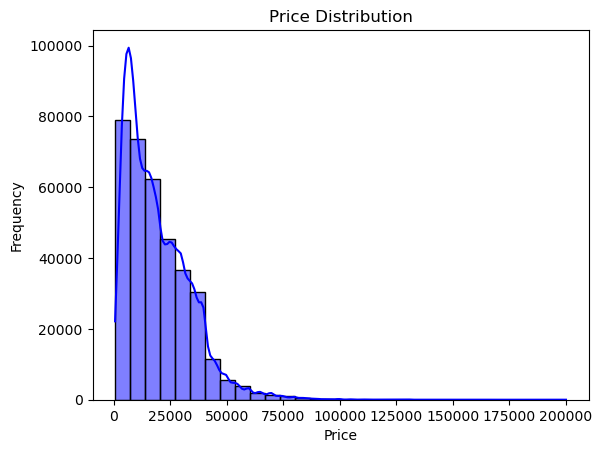

In [65]:
# Visualize distribution of the target variable (Price)
sns.histplot(car_data['price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.savefig("images/Price_Distribution.jpg")
plt.show()

In [83]:
# Observation-5: The Price data is right skewed distribution 

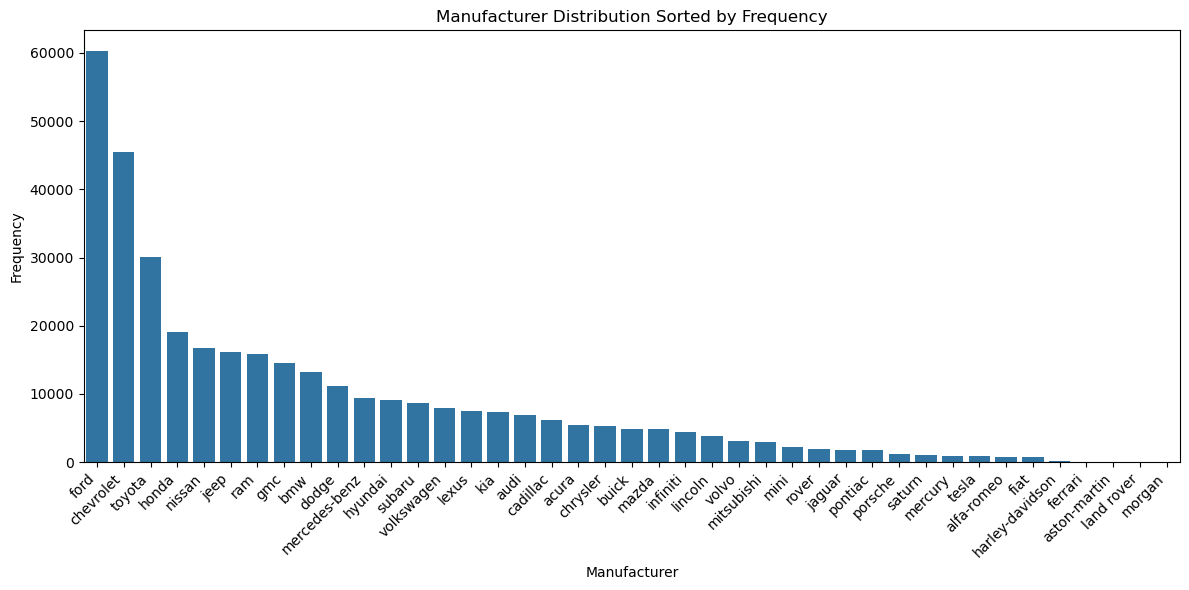

In [67]:
plt.figure(figsize=(12, 6))
sns.countplot(car_data, x='manufacturer', order= car_data['manufacturer'].value_counts().index)
plt.title('Manufacturer Distribution Sorted by Frequency')
plt.xlabel('Manufacturer')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("images/Manufacturer_Distribution.jpg")
plt.show()

In [69]:
# Observation-6: The manufacturers Ford, Chevy followed by Toyota and Honda sell the most cars 

In [71]:
# Bivariate Analysis

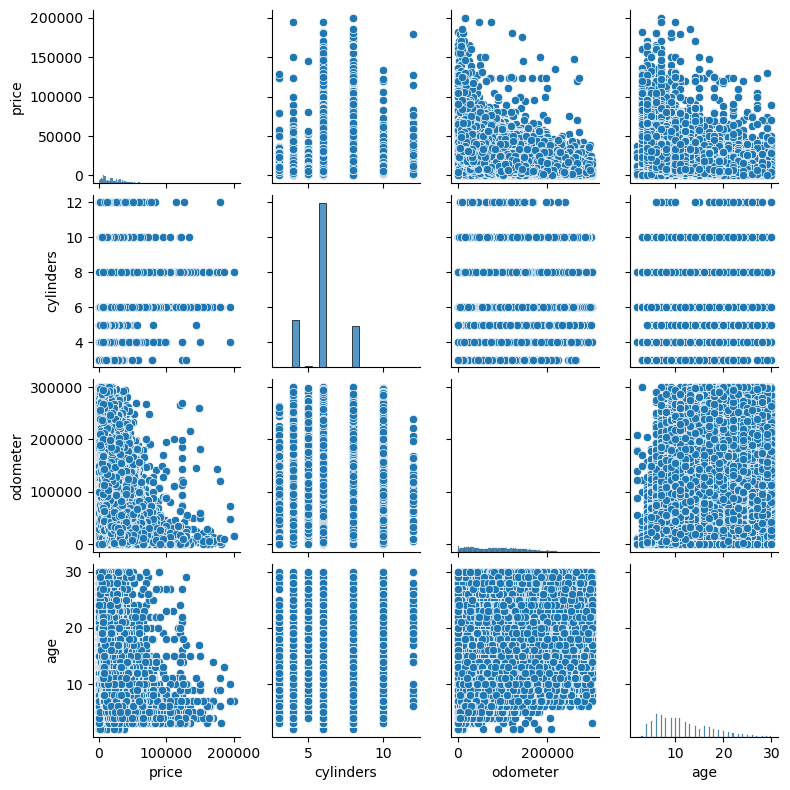

In [73]:
sns.pairplot(car_data,height=2, aspect=1)
plt.savefig("images/pairplot.jpg")

In [75]:
# Lets look at the numerics features ploatted against price

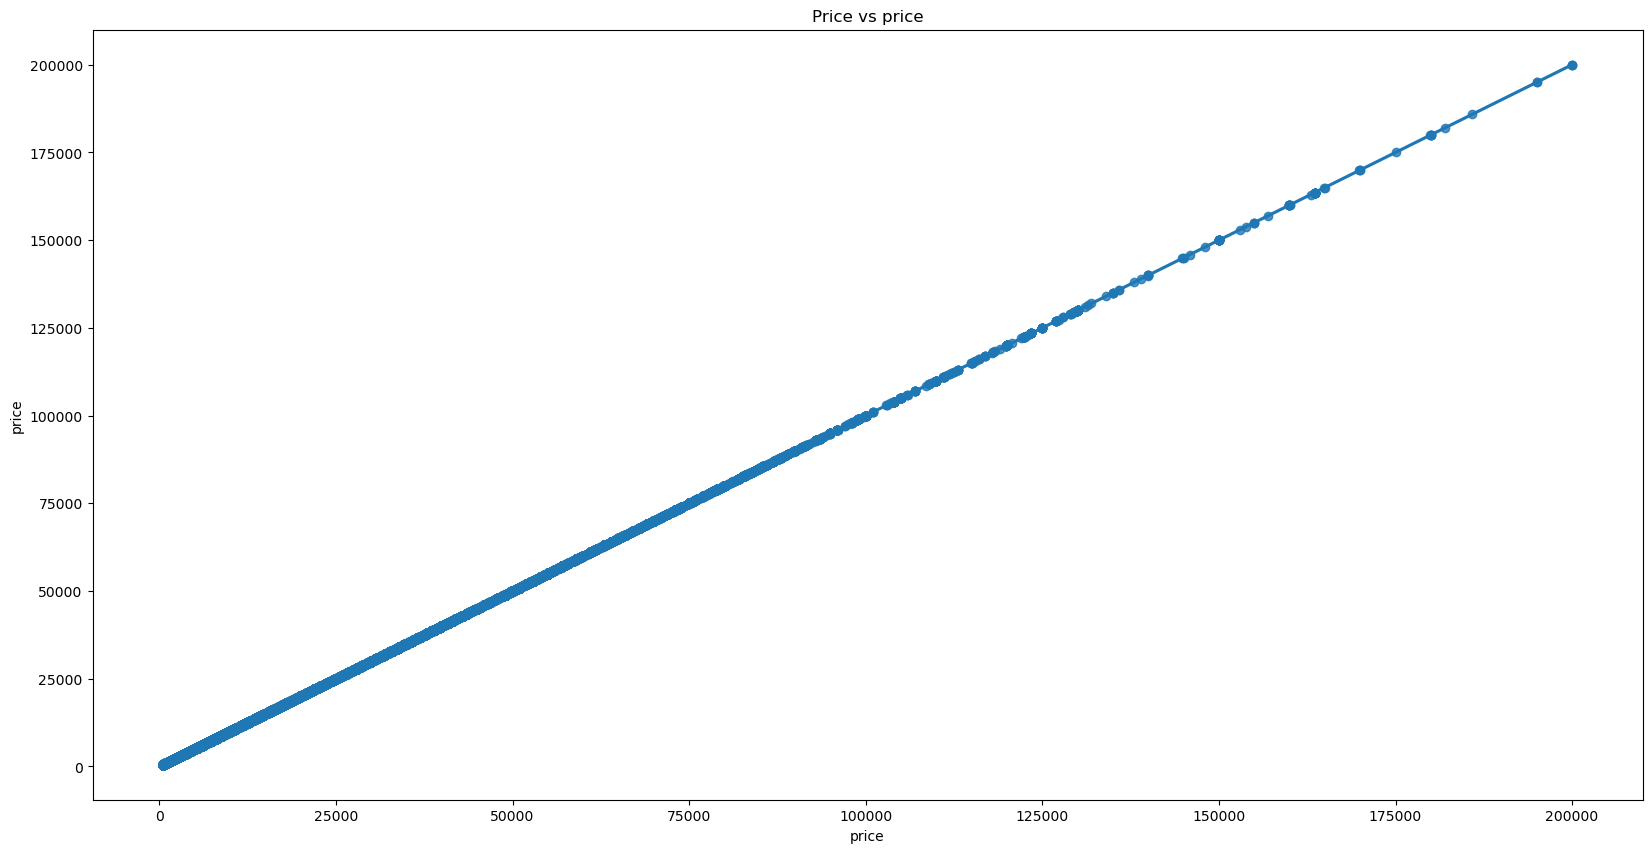

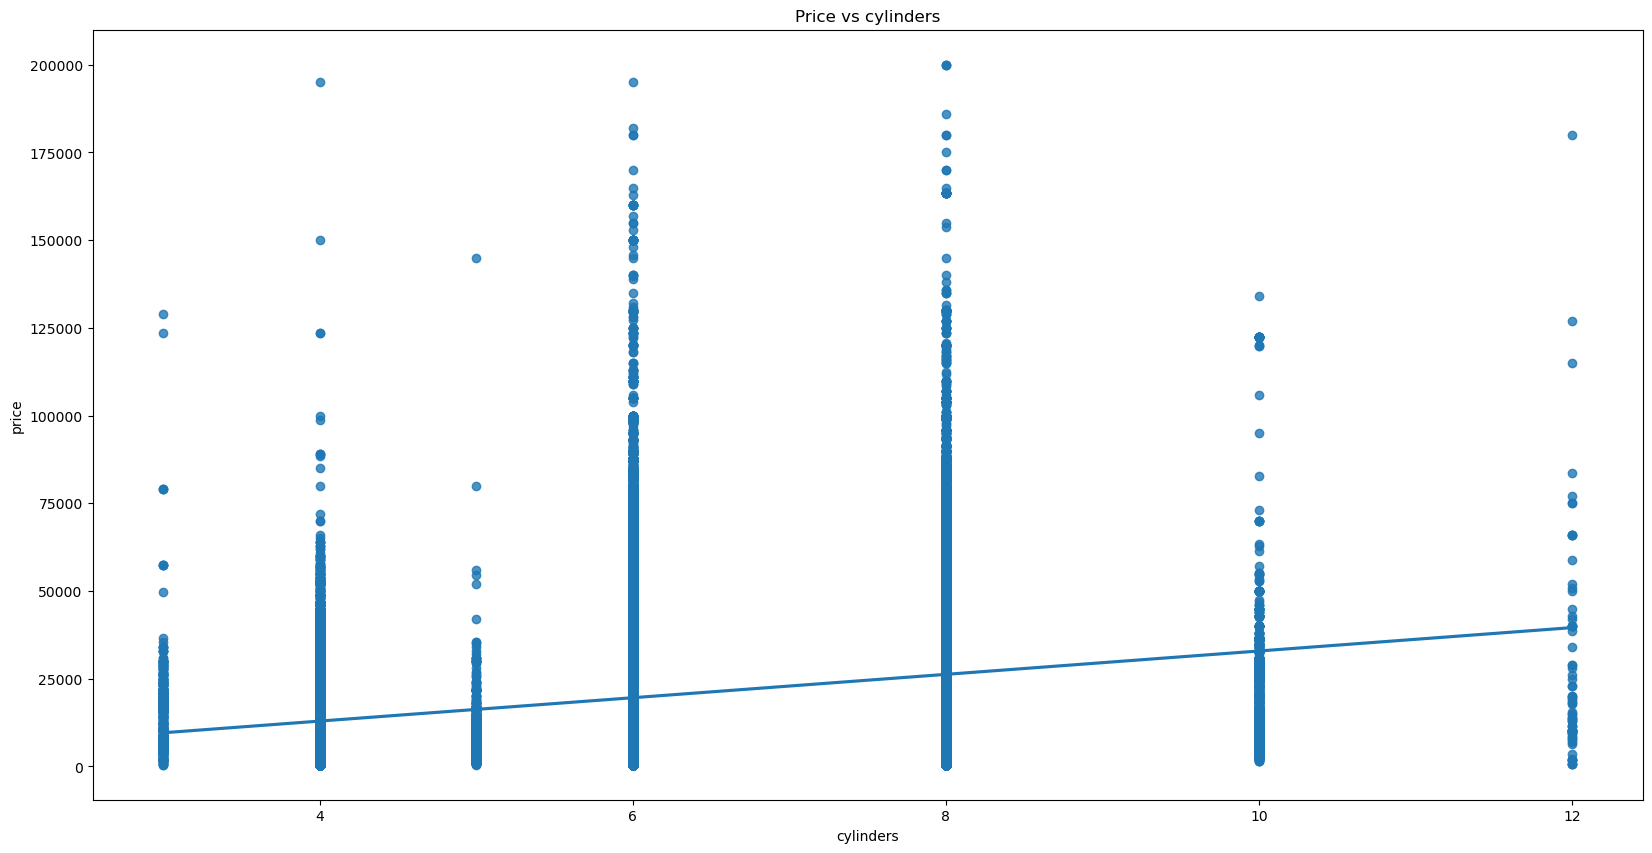

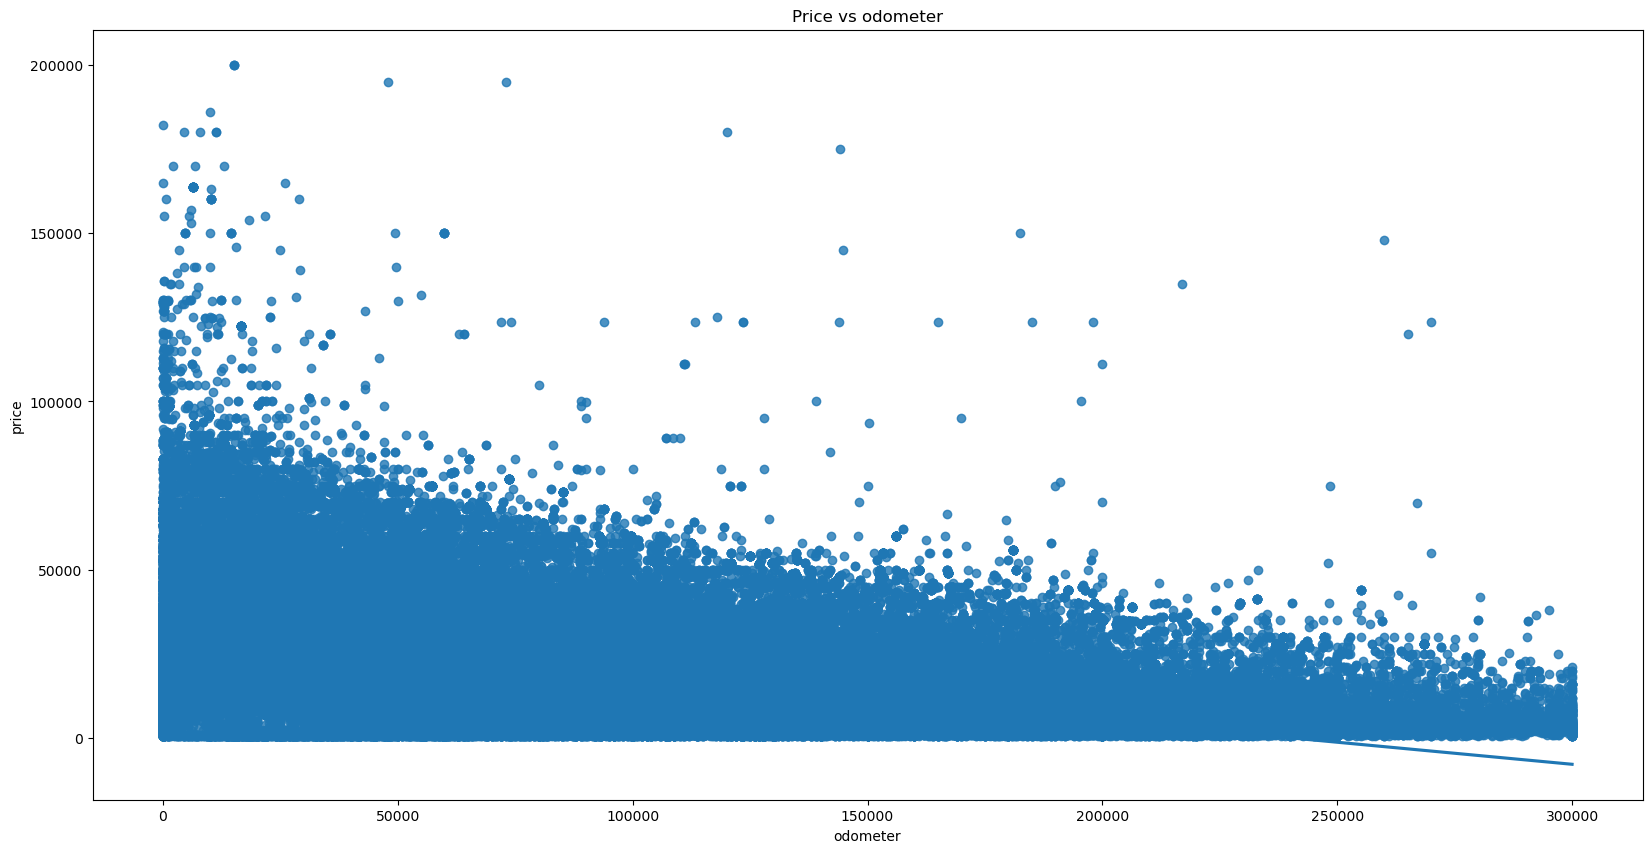

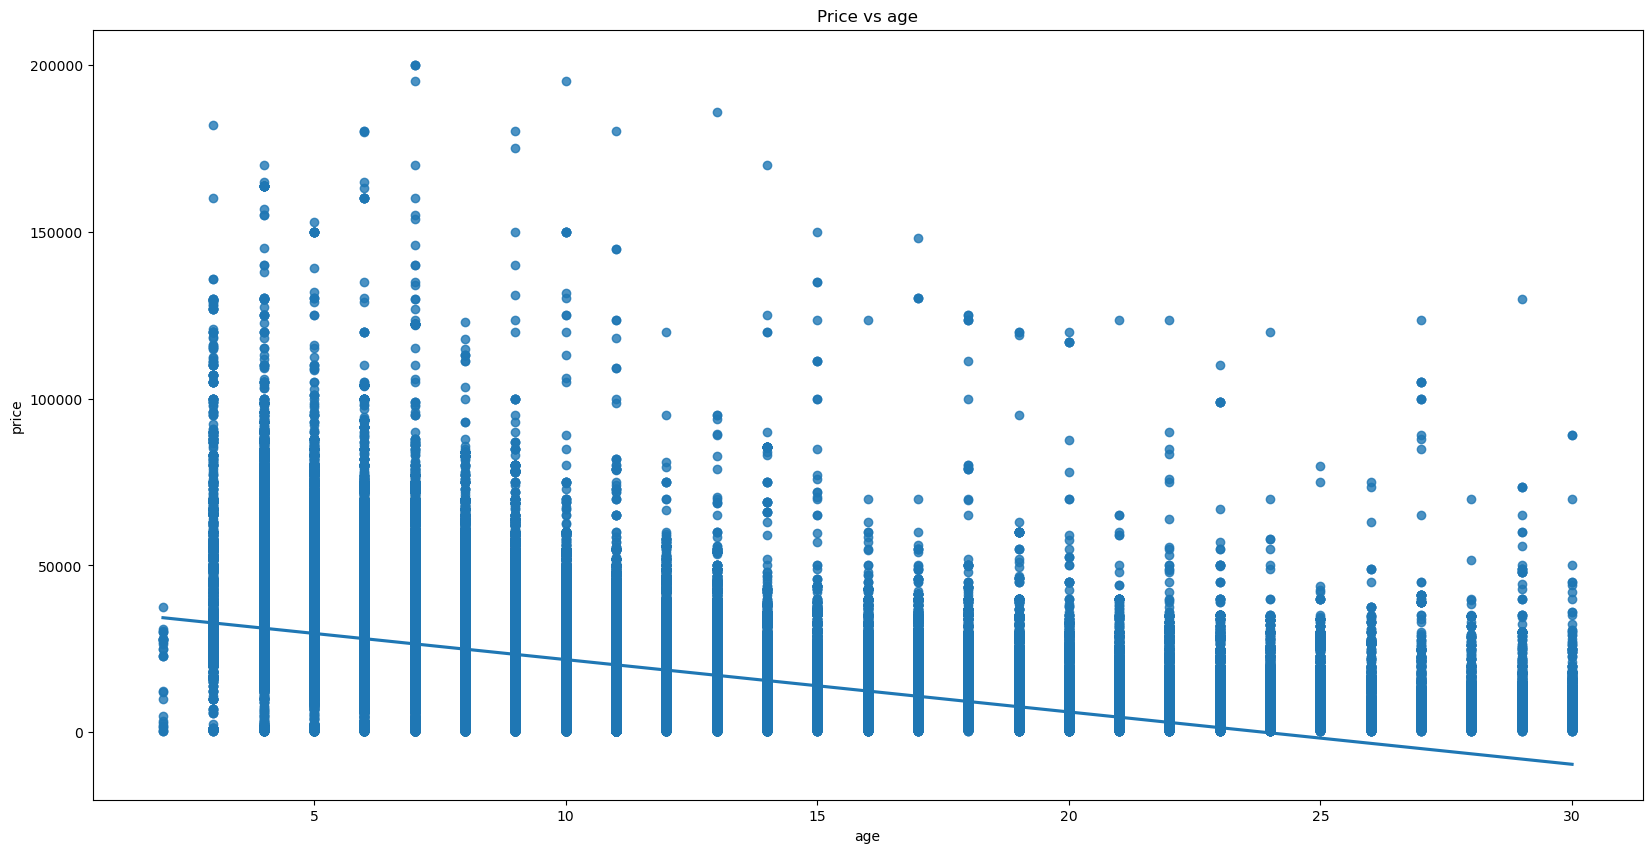

In [77]:
num_columns = car_data.select_dtypes(include=['int64', 'float64' ]).columns

for col in num_columns:
    plt.figure(figsize=(20,10))
    sns.regplot(data=car_data, y=car_data['price'], x=car_data[col])
    plt.title('Price vs ' + col)
    plt.show()

In [79]:
# Observation-7: 6 & 8 cylinders are most popular
# Price goes down as Odometer reading goes up 
# As Age goes up, average price goes down..

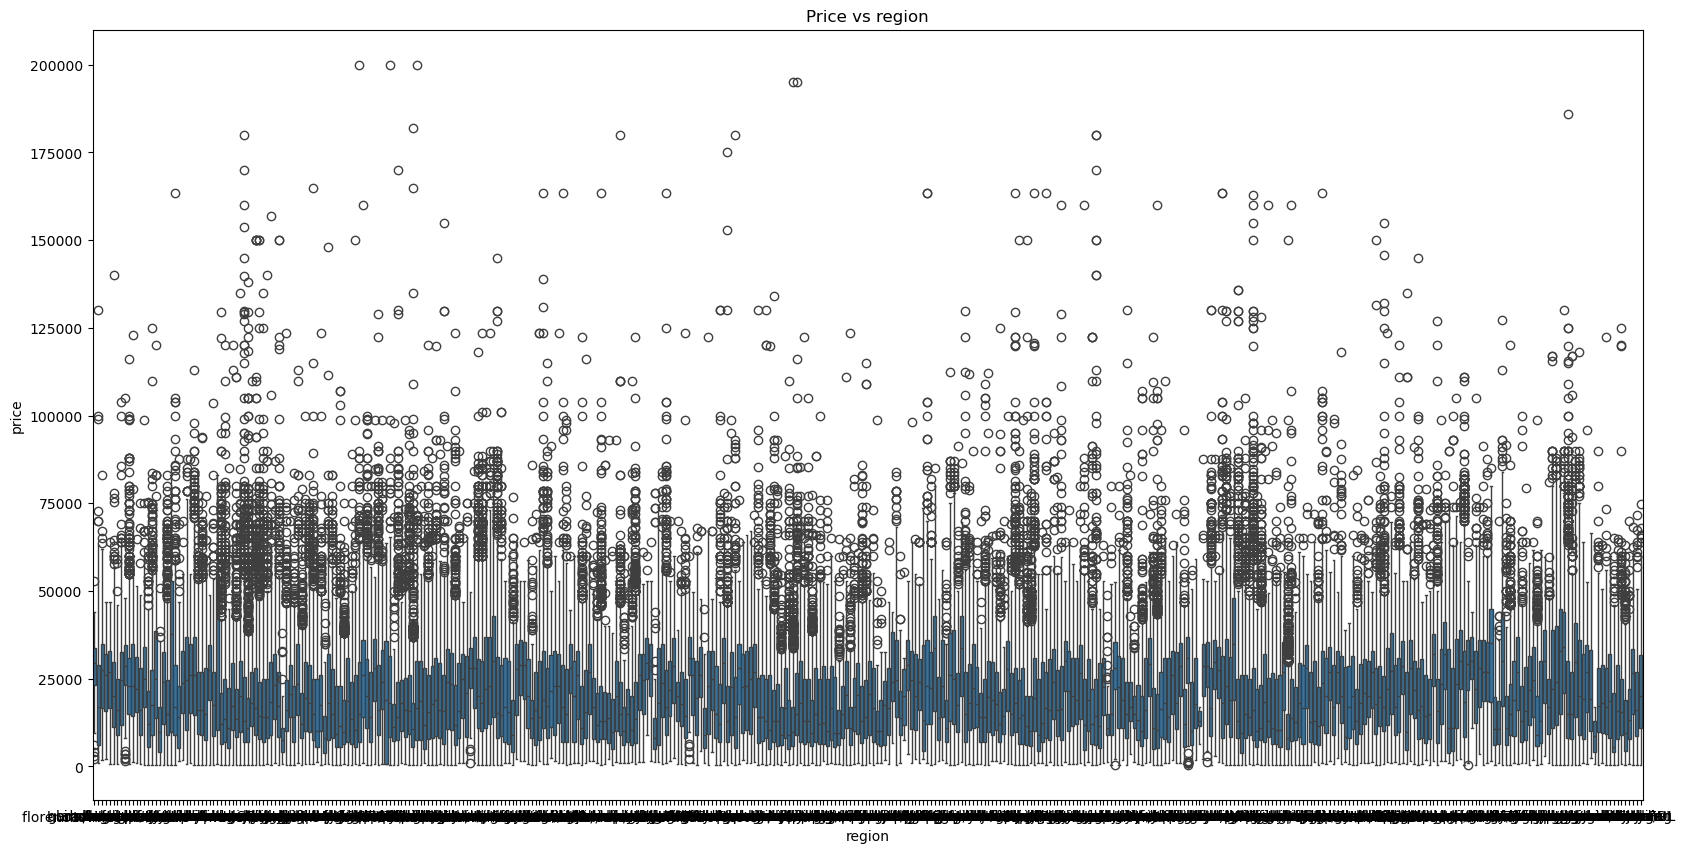

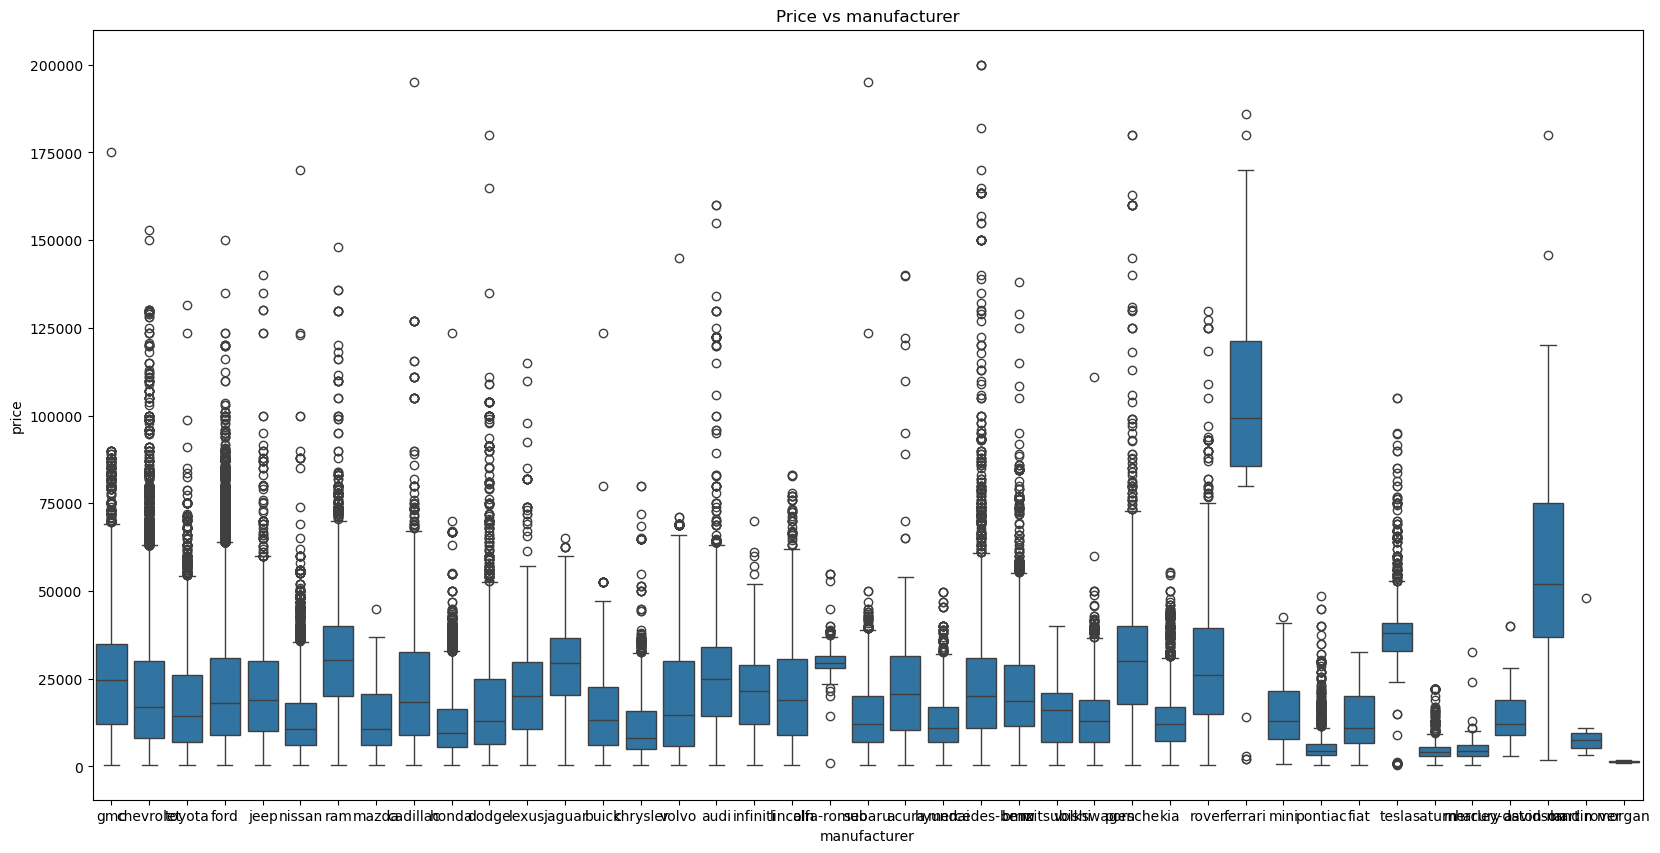

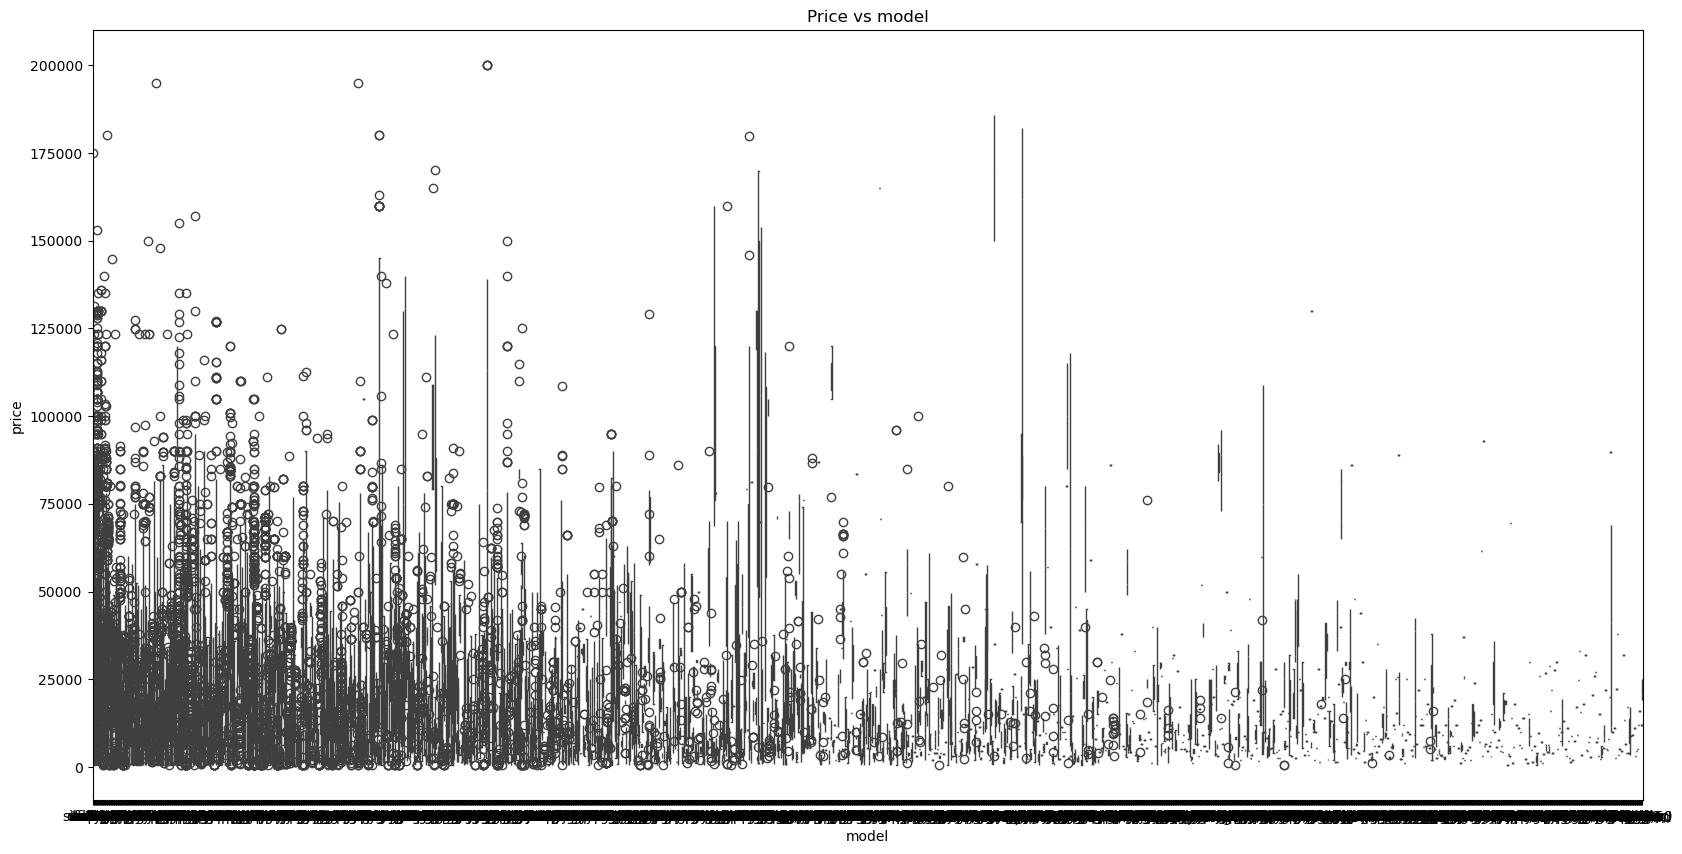

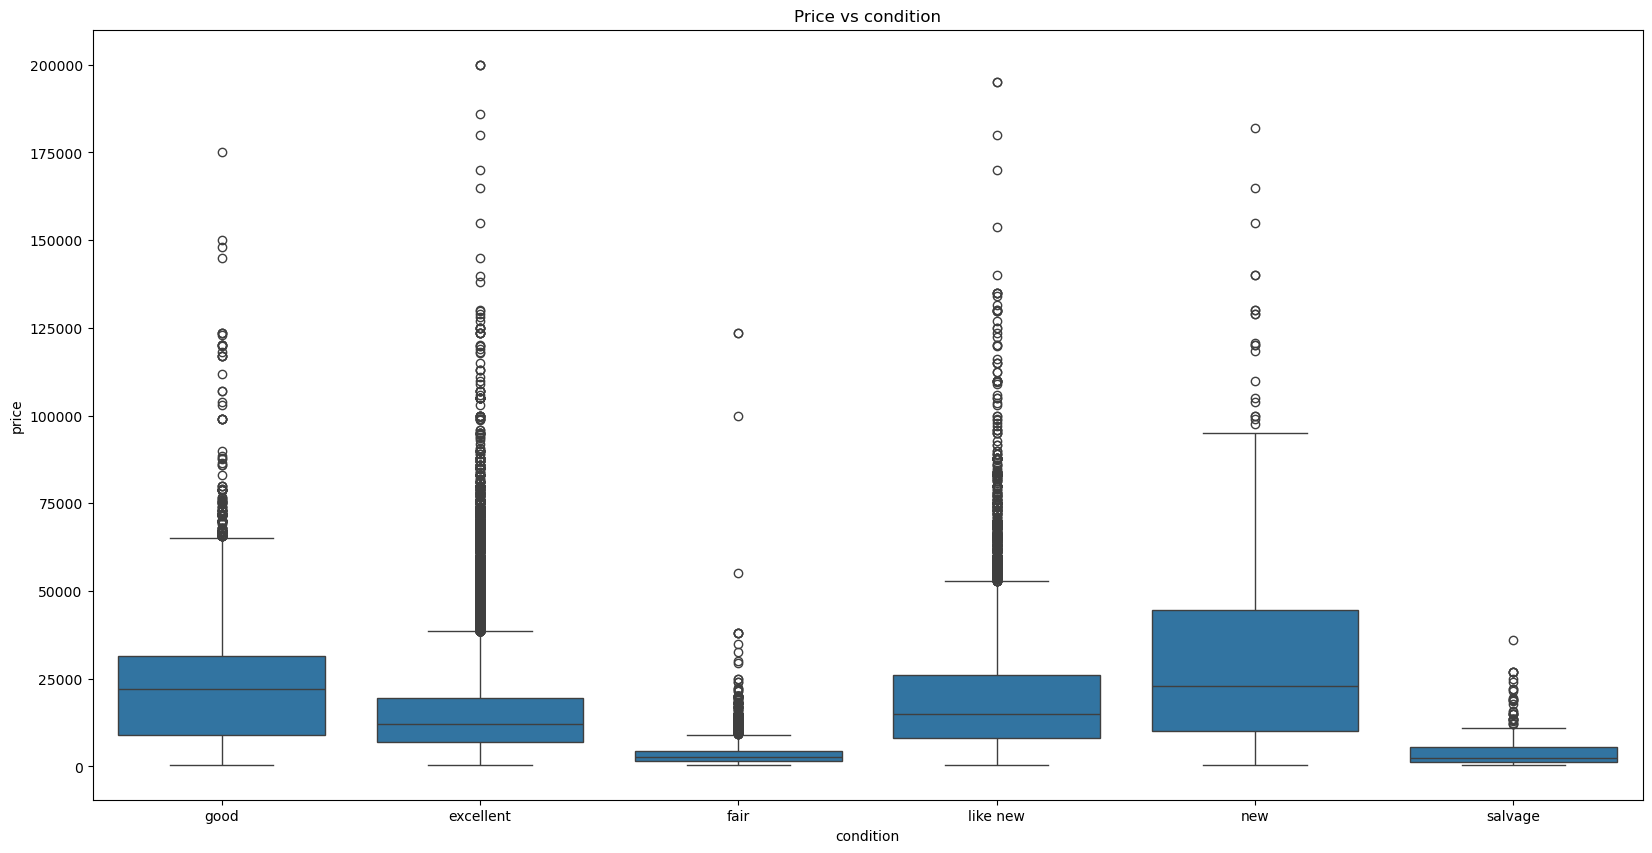

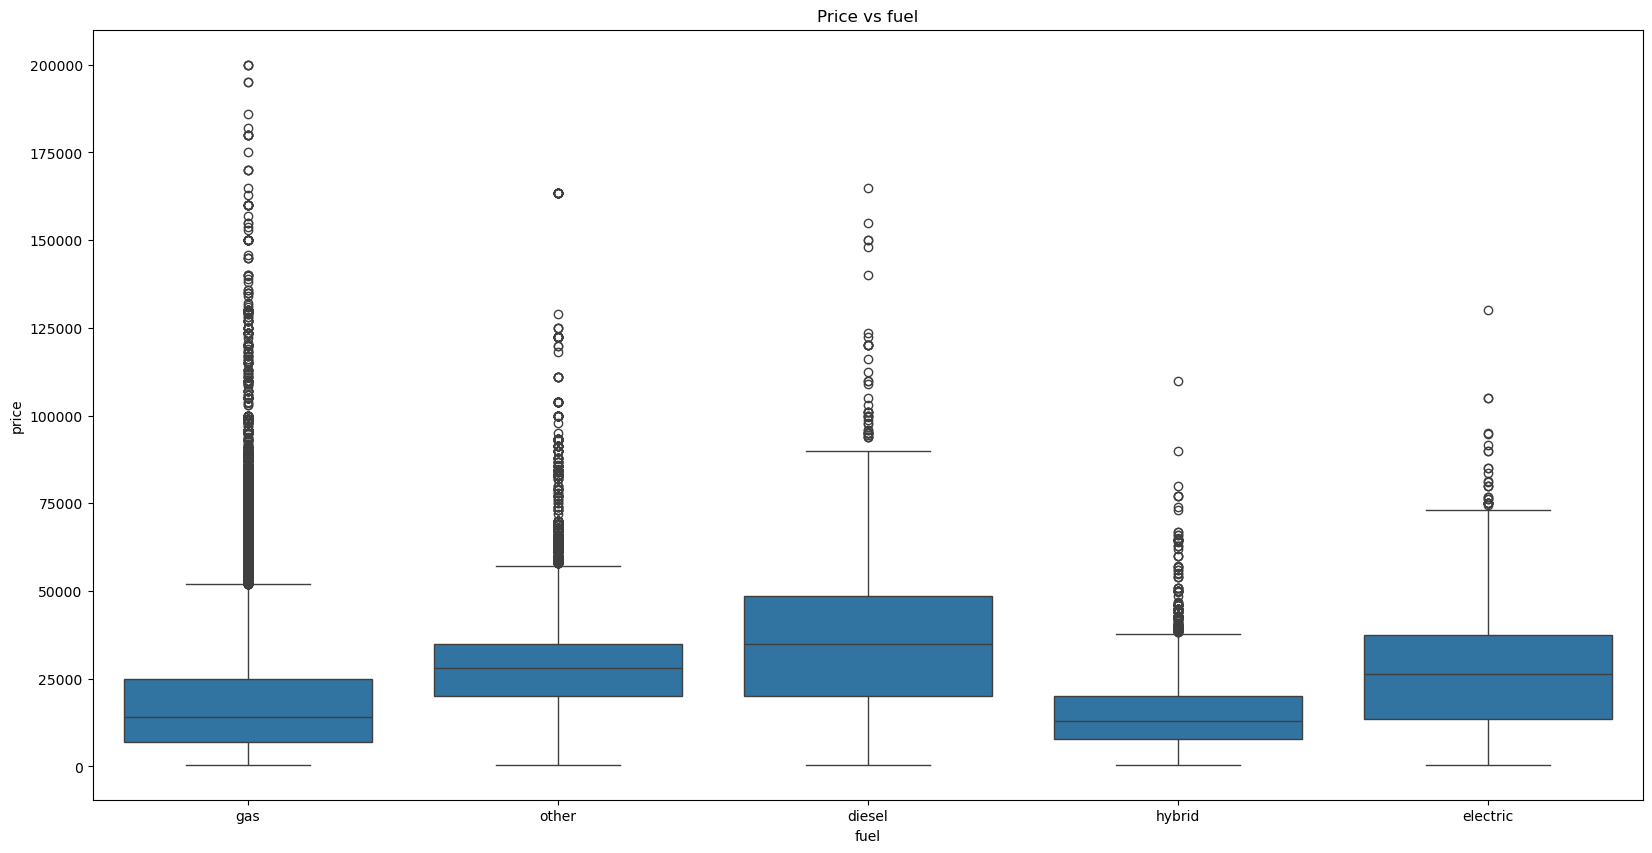

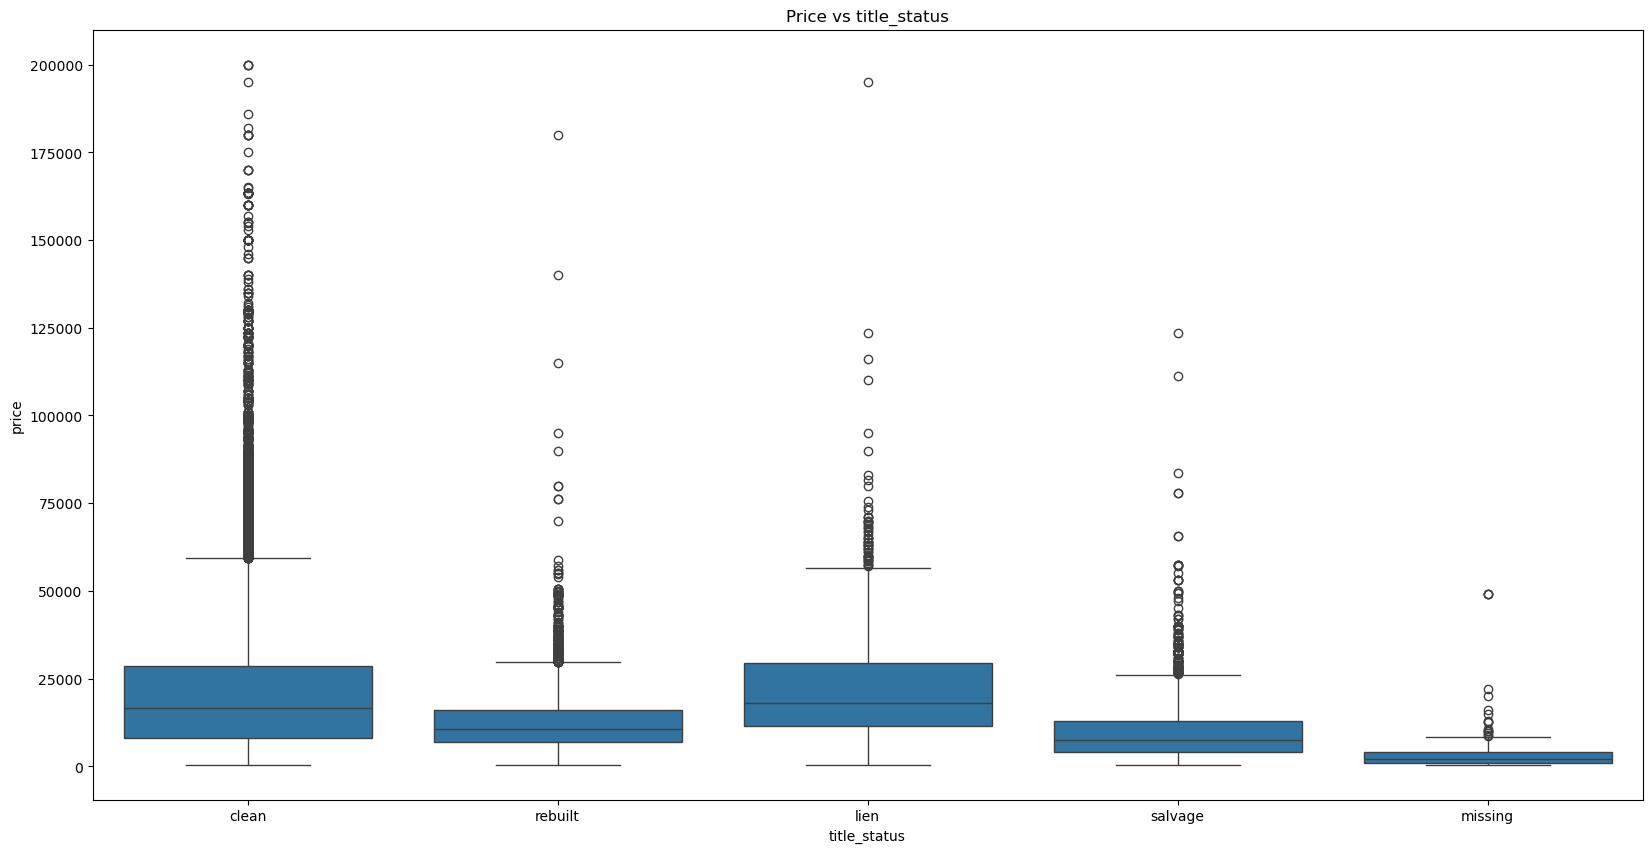

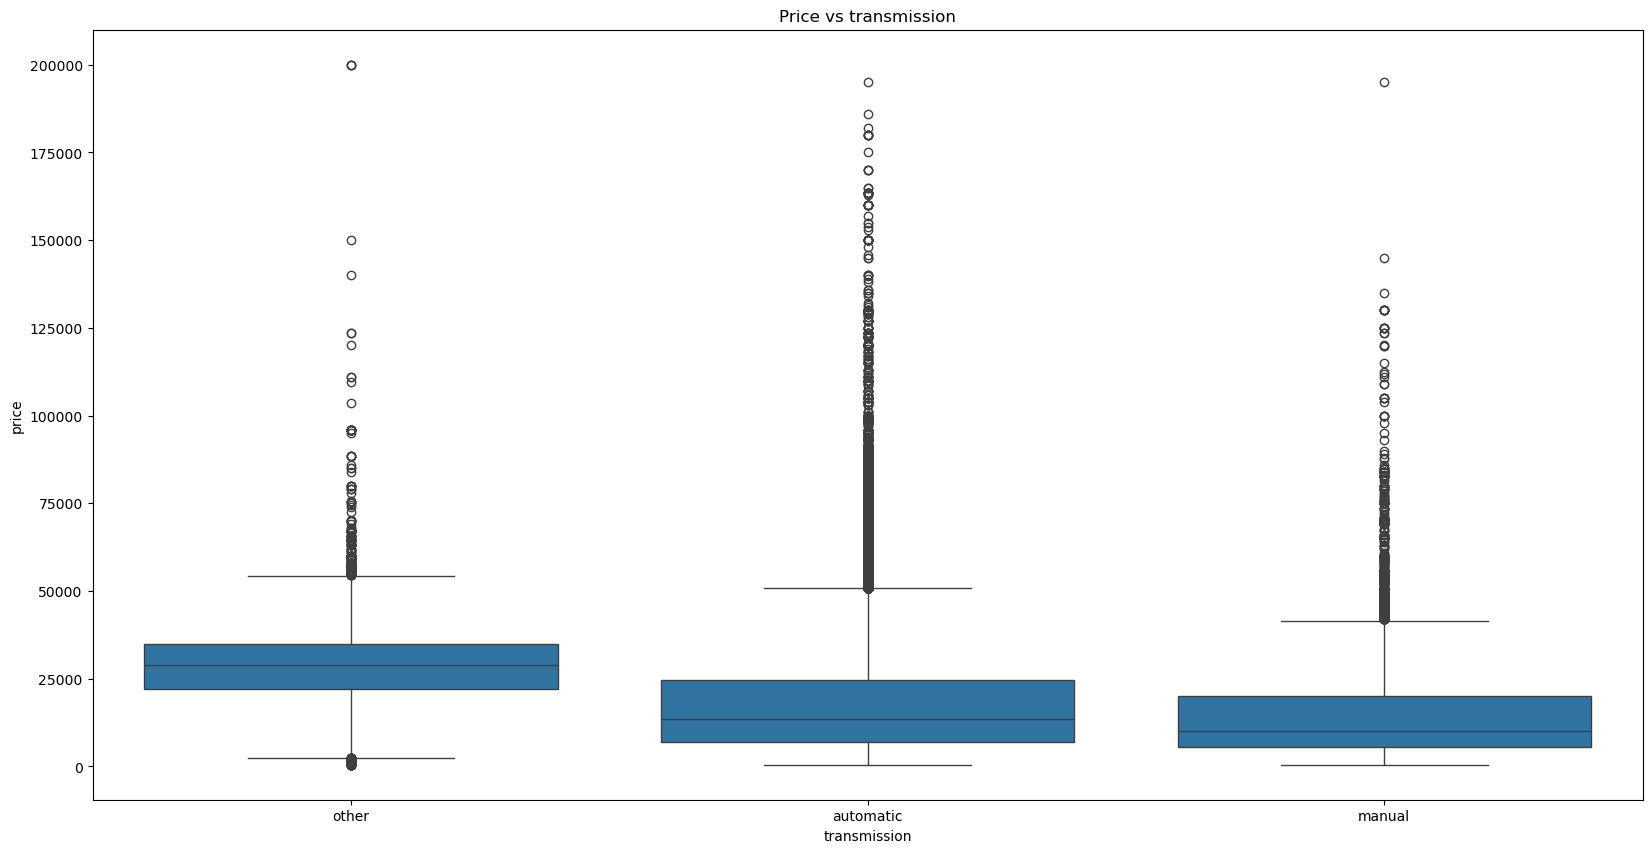

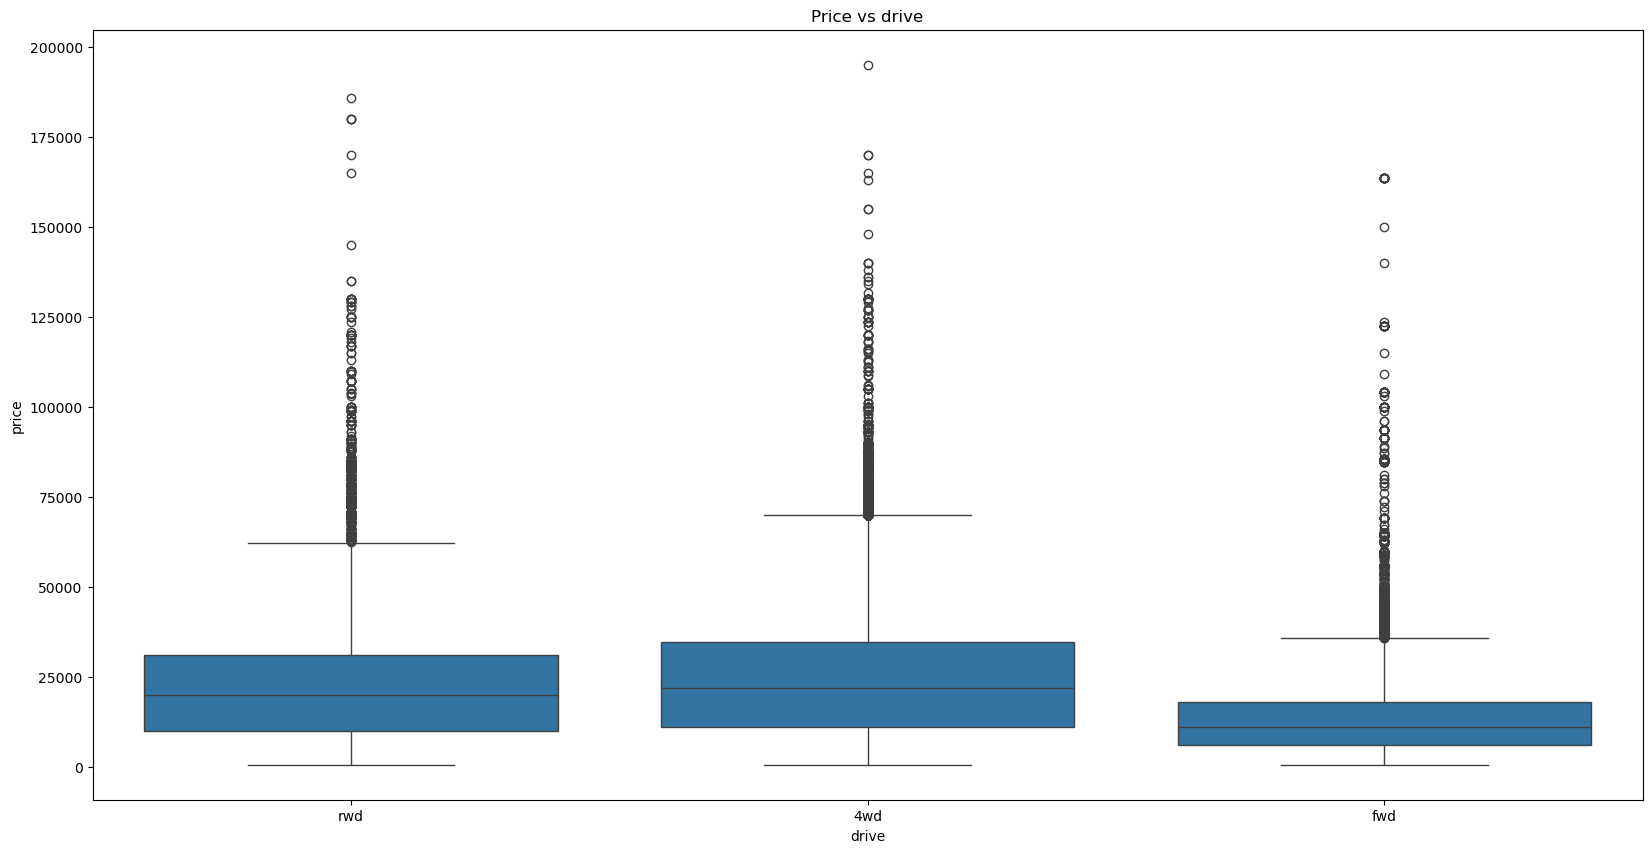

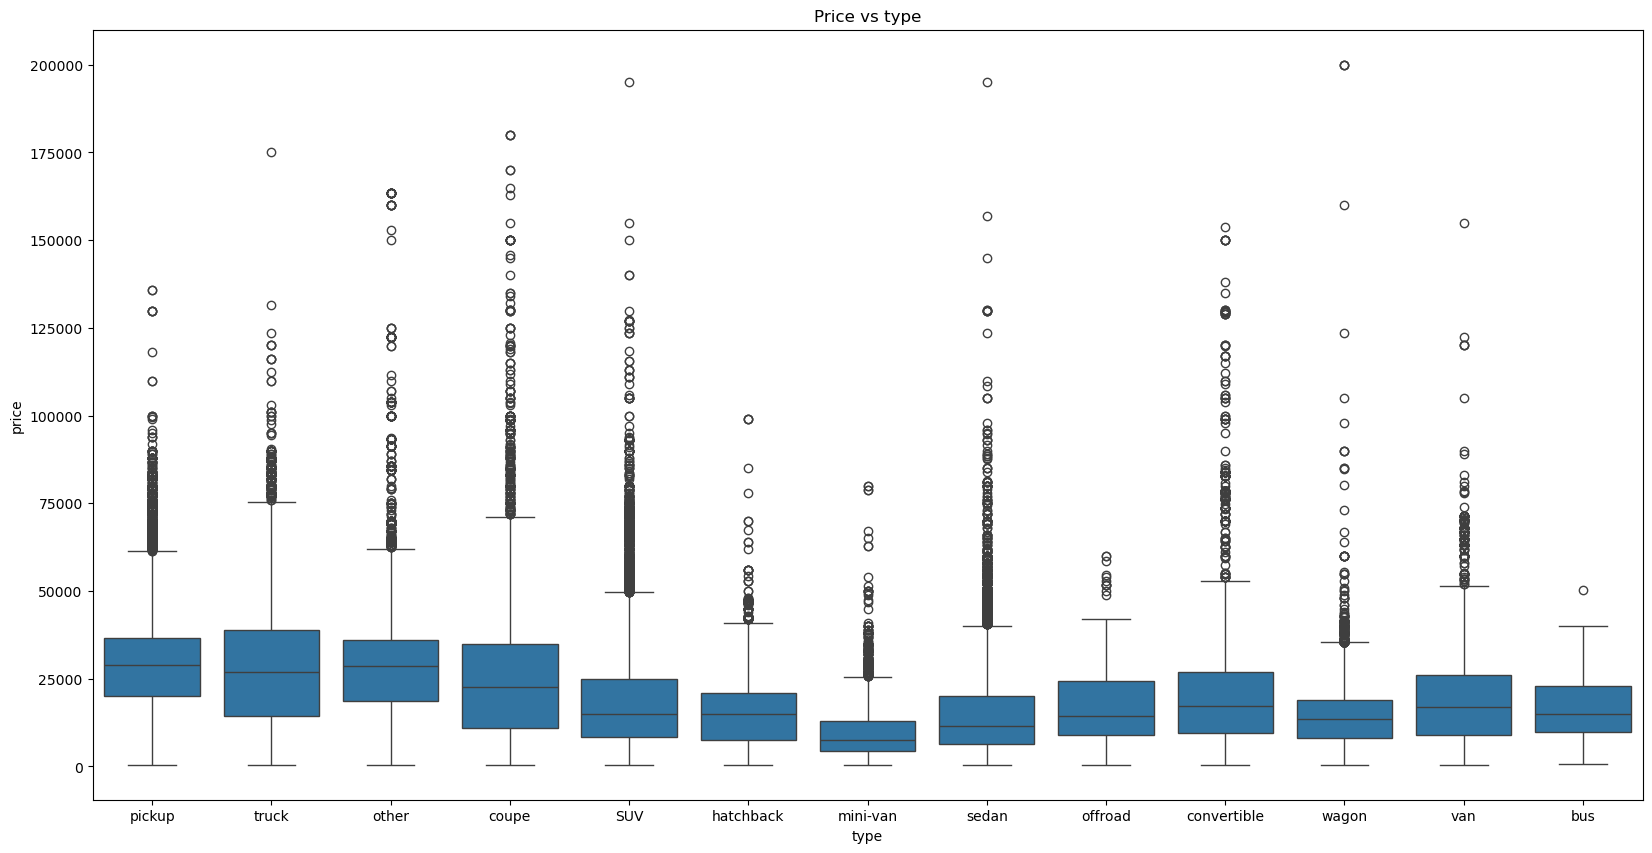

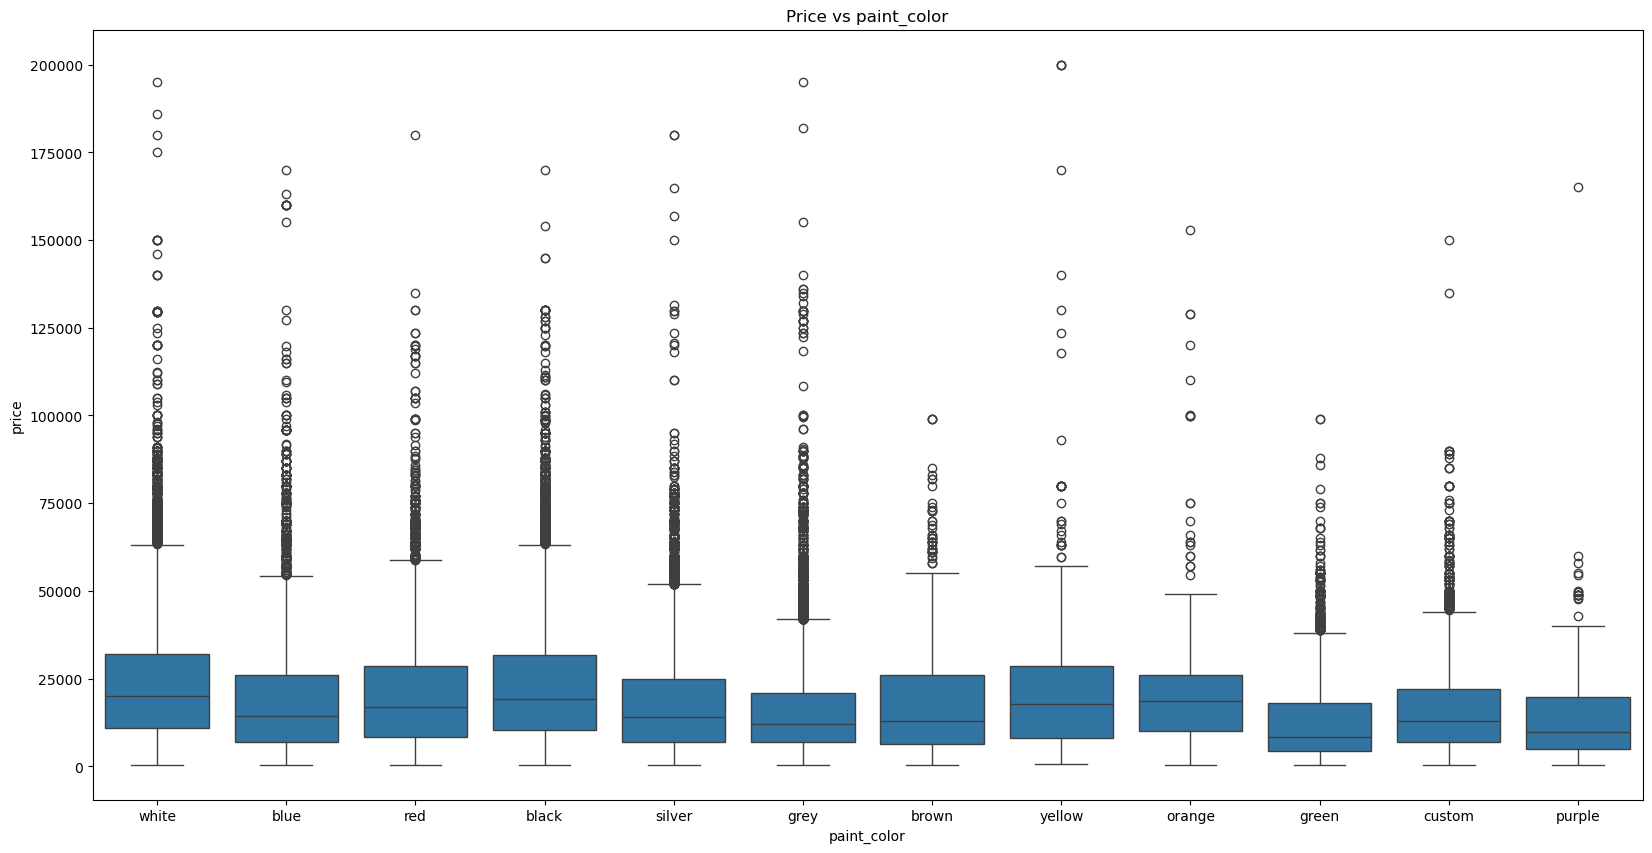

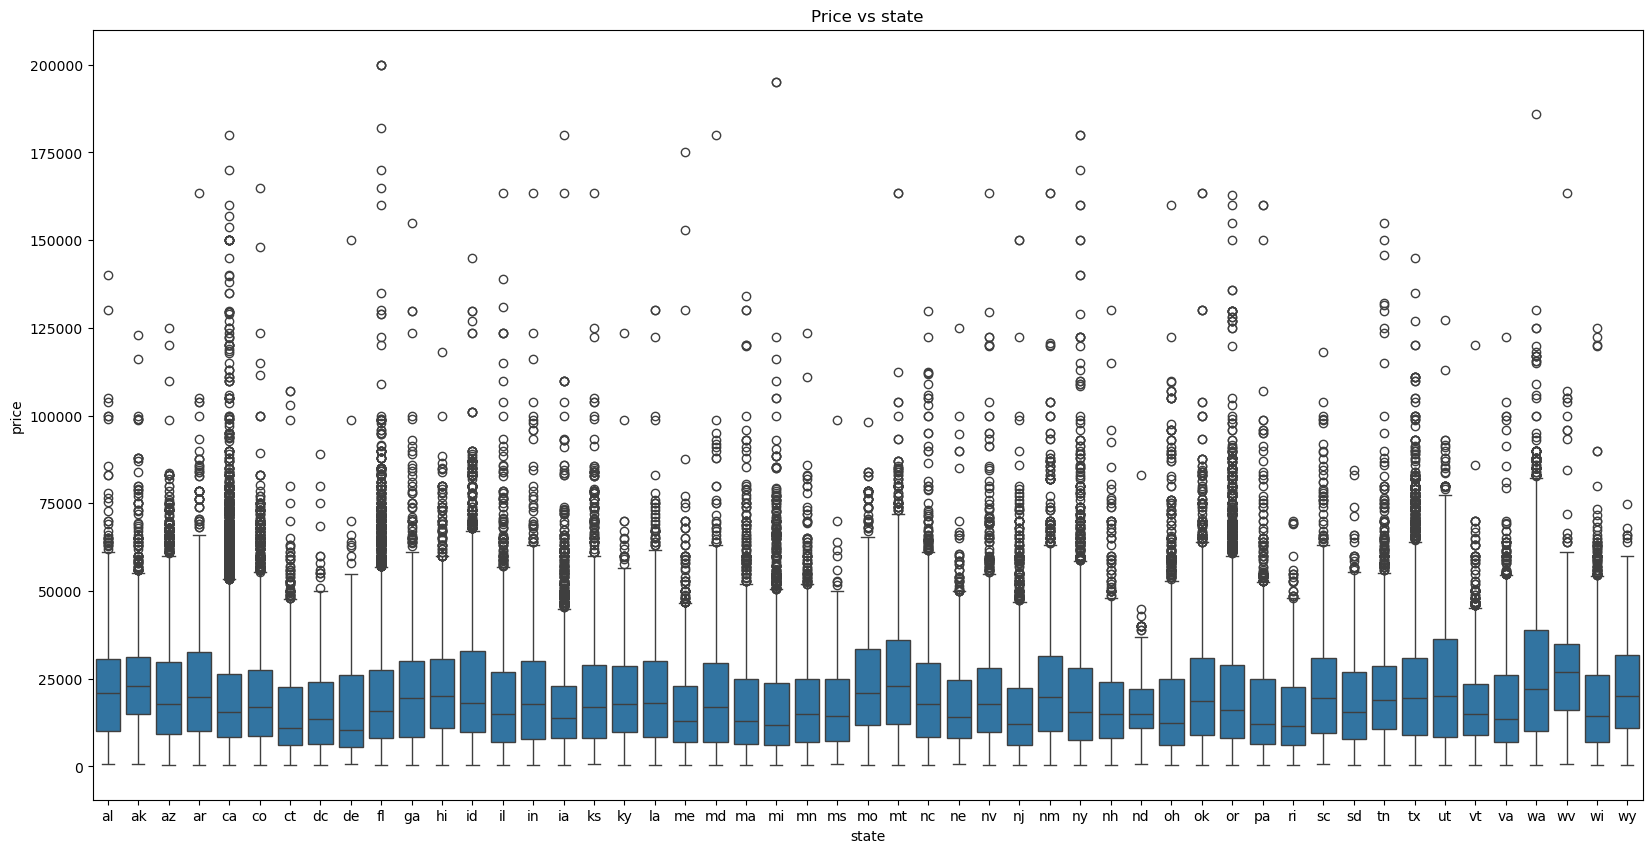

In [81]:
object_columns = car_data.select_dtypes(include='object').columns

for col in object_columns:
    plt.figure(figsize=(20,10))
    sns.boxplot(data=car_data, x=car_data[col], y=car_data['price'])
    plt.title("Price vs "+ col)
    plt.show()

In [83]:
# Observation-8: The Region data is too extensive for any meaningful insights. Same with Model data
# Ferrari cars have higher price than other cars
# Looig at the 2-D graphs, there are no more outliers that we need to deal with except for missing data.. 

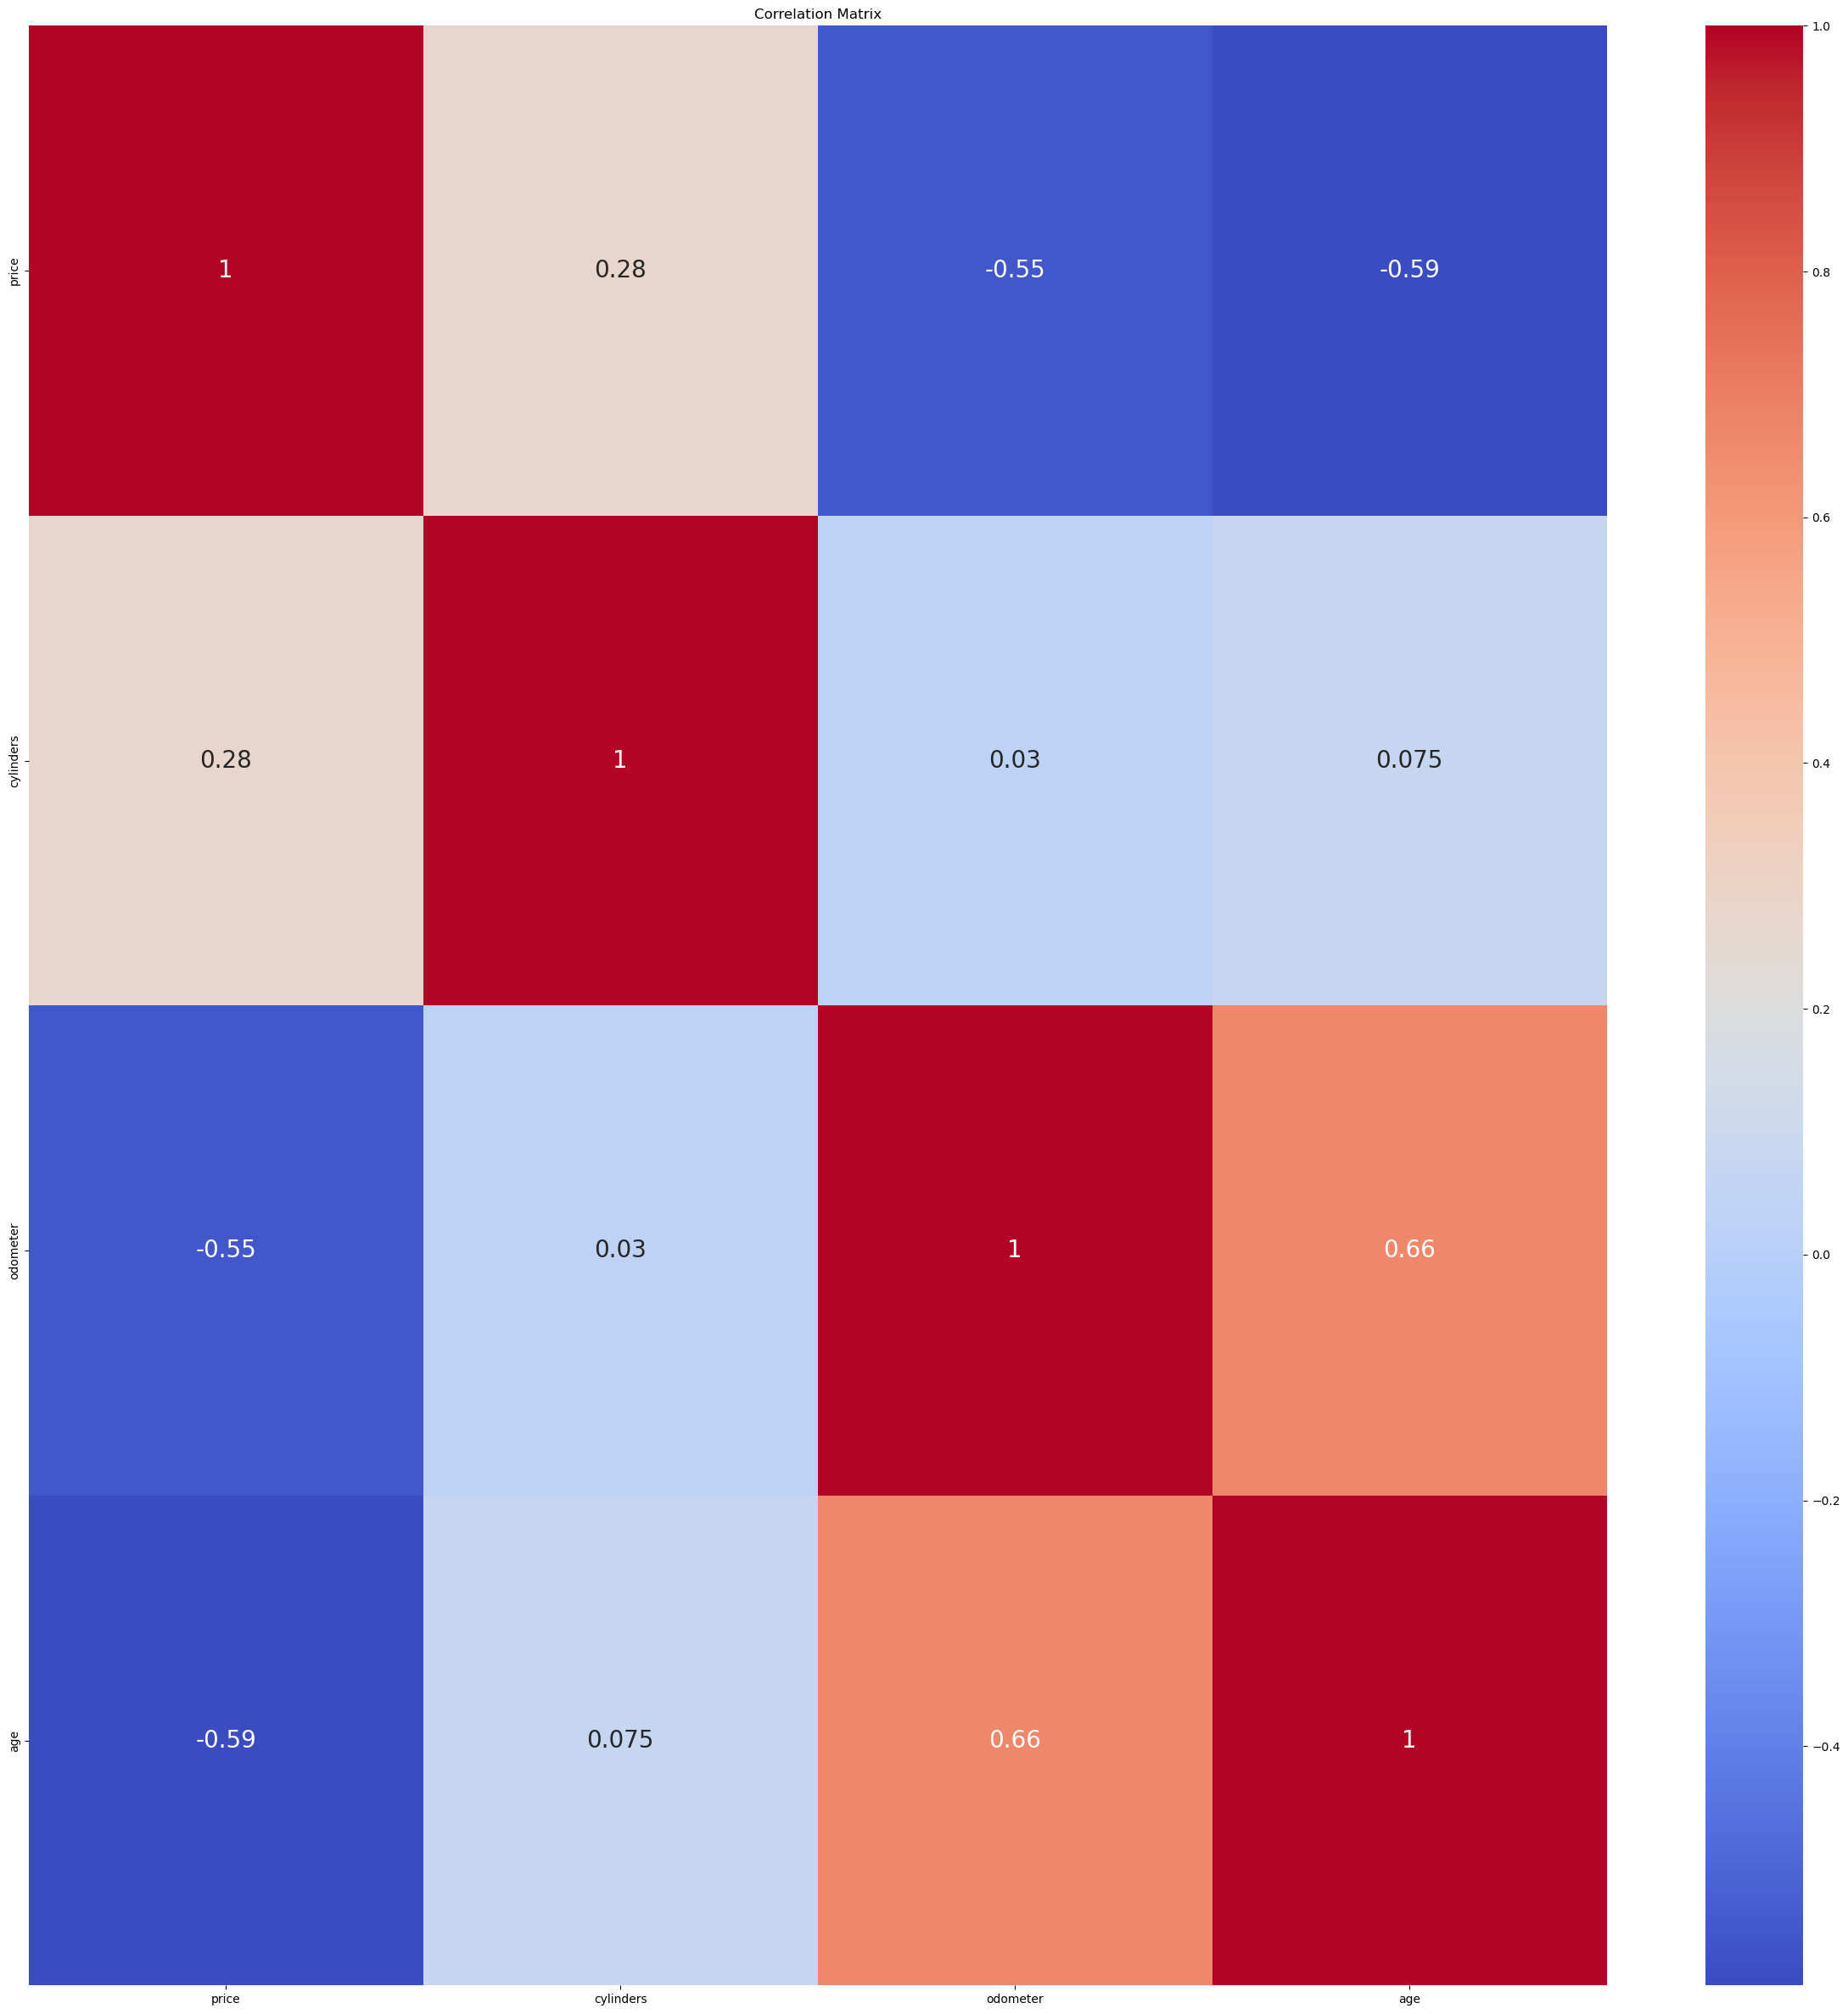

price        1.000000
cylinders    0.275648
odometer    -0.551959
age         -0.594714
Name: price, dtype: float64

In [107]:
# Build the correlation heatmap between the numberical value features 

# Calculate the Correlation 
correlation_matrix = car_data.select_dtypes(include=['int64', 'float64']).corr()

# Plot the data in a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 20})
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values 
correlation_matrix['price'].sort_values(ascending=False)

In [85]:
# Observation-9: The Aga and Odometer are negatively related to and impact the price of the car
# The number of cylinders has only minor impact

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [87]:
# For modelling purpose, lets build X and y, training and test data sets. 

X = car_data.drop(['price'], axis=1)
y = car_data[['price']]

# Split the data into Training and Test sets 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

# Print the shape of the splits
print(f"Train features shape: {X_train.shape}")
print(f"Test features shape: {X_test.shape}")
print(f"Train labels shape: {y_train.shape}")
print(f"Test labels shape: {y_test.shape}")

Train features shape: (247405, 14)
Test features shape: (106032, 14)
Train labels shape: (247405, 1)
Test labels shape: (106032, 1)


In [89]:
# Before encoding all features lets do imputation of missing values. 
# This is done after split to remove any data leakage

columns_to_process = car_data.select_dtypes(include='object').columns

# fill the missing data for the training dataset
for col in columns_to_process:
    # Get non-null values and their probabilities
    value_counts = X_train[col].dropna().value_counts(normalize=True)
    
    # Assign missing values randomly based on probabilities
    X_train[col] = X_train[col].apply(
        lambda x: np.random.choice(value_counts.index, p=value_counts.values) if pd.isnull(x) else x
    )

# fill the missing data for the test dataset
for col in columns_to_process:
    # Get non-null values and their probabilities
    value_counts = X_test[col].dropna().value_counts(normalize=True)
    
    # Assign missing values randomly based on probabilities
    X_test[col] = X_test[col].apply(
        lambda x: np.random.choice(value_counts.index, p=value_counts.values) if pd.isnull(x) else x
    )

In [91]:
X_train.head()

,region,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
210017,the thumb,gmc,yukon,new,6,gas,189674.0,clean,automatic,rwd,SUV,white,mi,15.0
111680,south florida,mazda,protege5,good,6,gas,220456.0,clean,automatic,4wd,convertible,silver,fl,21.0
108457,sarasota-bradenton,lexus,es,good,4,hybrid,67039.0,clean,automatic,fwd,sedan,black,fl,9.0
390074,danville,hyundai,sonata,good,6,gas,9570.0,clean,other,fwd,sedan,black,va,8.0
124124,atlanta,toyota,4runner,good,6,gas,137933.0,clean,automatic,rwd,SUV,silver,ga,10.0


In [93]:
# Identify the precentage of values missing in each column
print( "\nPercent of missing :\n\n", round(X_test.isna().sum() / X_test.isna().count() * 100, 2))


Percent of missing :

 region          0.0
manufacturer    0.0
model           0.0
condition       0.0
cylinders       0.0
fuel            0.0
odometer        0.0
title_status    0.0
transmission    0.0
drive           0.0
type            0.0
paint_color     0.0
state           0.0
age             0.0
dtype: float64


In [95]:
# Observation-10: Now we have filled all the missing data 

In [97]:
# We shall use 2 techniques for encoding based on the number of unique values each feature has

# 1. For the features manufacturer, type, paint_color we shall use ordinal encoding 
features_to_encode = ['manufacturer', 'type', 'paint_color','condition', 'fuel', 'title_status', 'transmission', 'drive']
ordinal_encoder = OrdinalEncoder()
X_train[features_to_encode] = ordinal_encoder.fit_transform(X_train[features_to_encode])
X_test[features_to_encode] = ordinal_encoder.fit_transform(X_test[features_to_encode])

# 2. For the features region, model, state we shall use frequency encoding
high_cardinality_cols = ['region', 'model', 'state']

for col in high_cardinality_cols:
    freq_encoding = X_train[col].value_counts(normalize=True).to_dict()
    X_train[col] = X_train[col].map(freq_encoding)

for col in high_cardinality_cols:
    freq_encoding = X_test[col].value_counts(normalize=True).to_dict()
    X_test[col] = X_test[col].map(freq_encoding)

In [99]:
# Now lets look at the info to see if all the features are converted into numeric values
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 247405 entries, 210017 to 148727
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   region        247405 non-null  float64
 1   manufacturer  247405 non-null  float64
 2   model         247405 non-null  float64
 3   condition     247405 non-null  float64
 4   cylinders     247405 non-null  int64  
 5   fuel          247405 non-null  float64
 6   odometer      247405 non-null  float64
 7   title_status  247405 non-null  float64
 8   transmission  247405 non-null  float64
 9   drive         247405 non-null  float64
 10  type          247405 non-null  float64
 11  paint_color   247405 non-null  float64
 12  state         247405 non-null  float64
 13  age           247405 non-null  float64
dtypes: float64(13), int64(1)
memory usage: 28.3 MB


In [101]:
# Lets look at the first few records for X_train dataset
X_train.head()

,region,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age
210017,0.000796,13.0,0.006245,4.0,6,2.0,189674.0,0.0,0.0,2.0,0.0,10.0,0.043261,15.0
111680,0.007077,24.0,0.000040,2.0,6,2.0,220456.0,0.0,0.0,0.0,2.0,9.0,0.067723,21.0
108457,0.007623,22.0,0.003189,2.0,4,3.0,67039.0,0.0,0.0,1.0,9.0,0.0,0.067723,9.0
390074,0.000756,16.0,0.007393,2.0,6,2.0,9570.0,0.0,2.0,1.0,9.0,0.0,0.022716,8.0
124124,0.006718,38.0,0.006136,2.0,6,2.0,137933.0,0.0,0.0,2.0,0.0,9.0,0.016366,10.0


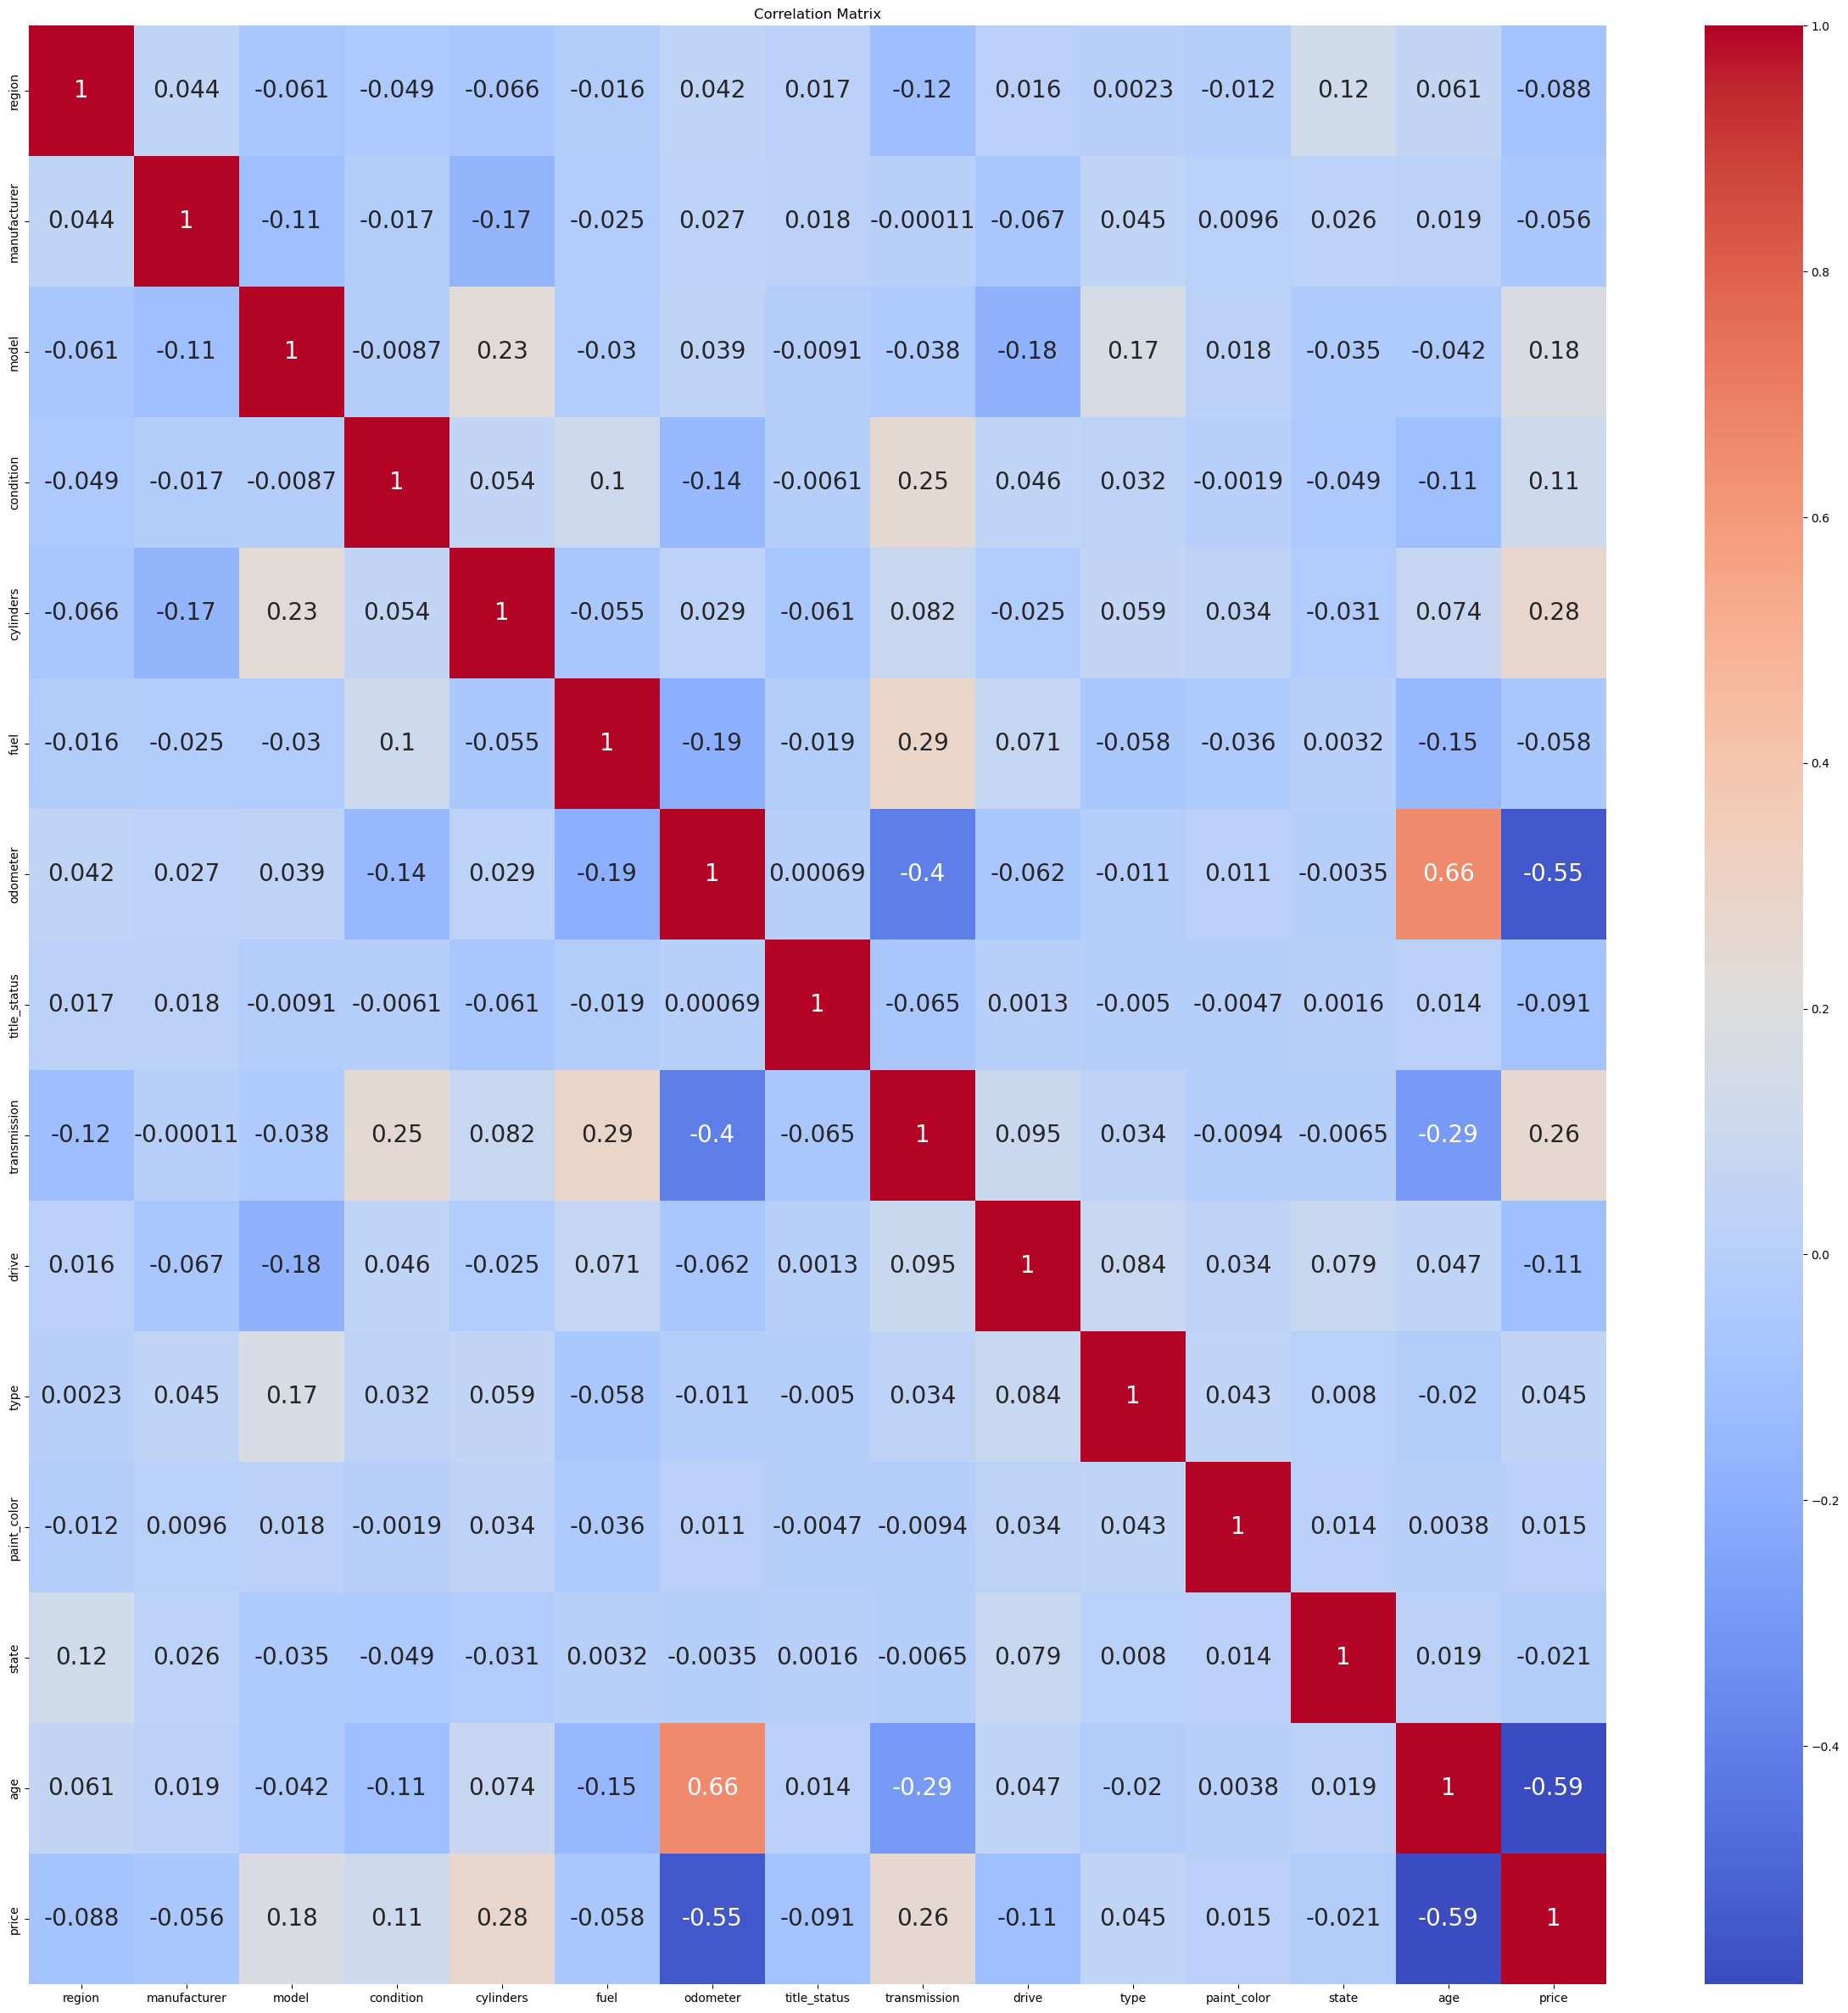

price           1.000000
cylinders       0.277323
transmission    0.258345
model           0.176695
condition       0.110385
type            0.045280
paint_color     0.014552
state          -0.020939
manufacturer   -0.056049
fuel           -0.058006
region         -0.087514
title_status   -0.090933
drive          -0.109932
odometer       -0.552009
age            -0.593934
Name: price, dtype: float64

In [103]:
# Build the correlation heatmap between the numberical value features 

X_Check = X_train.copy()
X_Check['price'] = y_train

# Calculate the Correlation 
correlation_matrix = X_Check.select_dtypes(include=['int64', 'float64']).corr()

# Plot the data in a heatmap
plt.figure(figsize=(30,30))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm',annot_kws={"size": 20})
plt.title('Correlation Matrix')
plt.show()

# Print the correlation values 
correlation_matrix['price'].sort_values(ascending=False)

In [105]:
# Observation-11: Clearly age and odometer have impact on price. The rest of them have only minimal impact

In [107]:
# We shall try modeling with 3 data sets 
# region,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,state,age 

# 1. Numerical features 
X1_train = X_train[['cylinders', 'odometer', 'age']] 
X1_test = X_test[['cylinders', 'odometer', 'age']] 

# 2. Numerical and Simple features
X2_train  = X_train[['cylinders', 'odometer', 'age','manufacturer', 'type', 'paint_color','condition', 'fuel', 'title_status', 'transmission', 'drive']]
X2_test  = X_test[['cylinders', 'odometer', 'age','manufacturer', 'type', 'paint_color','condition', 'fuel', 'title_status', 'transmission', 'drive']]

# 3. All Features included in 1 & 2 and other features using frequency encoding 
X3_train  = X_train
X3_test  = X_test

In [109]:
# Define a function for measuring the errors and accuarcy 

def error_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    
    errors = {}
    
    # Errors for train data
    errors["Train_MAE"] = mean_absolute_error(y_train_true, y_train_pred)
    errors["Train_MSE"] = mean_squared_error(y_train_true, y_train_pred)
    errors["Train_RMSE"] = np.sqrt(errors["Train_MSE"])
    errors["Train_R2_Score"] = r2_score(y_train_true, y_train_pred)
    
    # Errors for test data
    errors["Test_MAE"] = mean_absolute_error(y_test_true, y_test_pred)
    errors["Test_MSE"] = mean_squared_error(y_test_true, y_test_pred)
    errors["Test_RMSE"] = np.sqrt(errors["Test_MSE"])
    errors["Test_R2_Score"] = r2_score(y_test_true, y_test_pred)
    
    return errors

model_evaluation = []

In [127]:
# Modeling, we shall try the following 3 methods on each dataset and verify the results 
# Linear Regression
# Ridge Regression
# Lasso Regression

In [111]:
# Linear Regression Model 

lr_pipe = Pipeline([
            ('scaler', StandardScaler()), 
            ('linreg', LinearRegression())
            ])

# fit and predict X1_train data 
lr_pipe.fit(X1_train,y_train)
y1_train_pred = lr_pipe.predict(X1_train)
y1_test_pred = lr_pipe.predict(X1_test)
error_lr1 = error_metrics(y_train, y1_train_pred, y_test, y1_test_pred)

error_lr1['Model Name']='Linear Regression Set1'
model_evaluation = (pd.DataFrame([error_lr1]))

# fit and predict X1_train data 
lr_pipe.fit(X2_train,y_train)
y2_train_pred = lr_pipe.predict(X2_train)
y2_test_pred = lr_pipe.predict(X2_test)
error_lr2 = error_metrics(y_train, y2_train_pred, y_test, y2_test_pred)
error_lr2['Model Name']='Linear Regression Set2'
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lr2]))], ignore_index=True)

# fit and predict X1_train data 
lr_pipe.fit(X3_train,y_train)
y3_train_pred = lr_pipe.predict(X3_train)
y3_test_pred = lr_pipe.predict(X3_test)
error_lr3 = error_metrics(y_train, y3_train_pred, y_test, y3_test_pred)
error_lr3['Model Name']='Linear Regression Set3'
model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lr3]))], ignore_index=True)

model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,7175.720251,1.074108e+08,10363.916919,0.497606,7174.062268,1.072338e+08,10355.373231,0.496972,Linear Regression Set1
1,6926.369908,9.888655e+07,9944.171546,0.537477,6916.092631,9.826852e+07,9913.047950,0.539028,Linear Regression Set2
2,6788.487205,9.724945e+07,9861.513581,0.545134,6780.368619,9.663264e+07,9830.189996,0.546702,Linear Regression Set3


In [131]:
# Observation on Linear Regression Models - The set 3 has better Train and Test MSE values as well as R2 scores

In [ ]:
# For Ridge mode tried the 2 parameters Alpha nd Polynomial degrees to get good estimate of the parameters. 

In [113]:
# Ridge Regression Model (commented out the data sets 1 and 2 for faster execution. I got results for all )

ridge_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polyfeatures', PolynomialFeatures(include_bias = False)),
    ('ridge', Ridge())
    ])

param_dict = {
    'ridge__alpha': [0.01, 0.1, 1, 10, 100],
    'polyfeatures__degree': [1, 2, 3, 4]
}
grid_search_ridge = GridSearchCV(ridge_pipe, param_dict, cv=5, scoring='neg_mean_squared_error')

# # For X1_train data set 

# # Fit and get the best model 
# grid_search_ridge.fit(X1_train, y_train)
# best_model_ridge = grid_search_ridge.best_estimator_
# # Use the best model to fit and predict 
# best_model_ridge.fit(X1_train, y_train)

# y1_train_pred_riedge = best_model_ridge.predict(X1_train)
# y1_test_pred_ridge = best_model_ridge.predict(X1_test)

# error_ridge1 = error_metrics(y_train, y1_train_pred_riedge, y_test, y1_test_pred_ridge)
# error_ridge1['Model Name'] = 'Ridge set1'

# model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge1]))], ignore_index=True)


# # For X2_train data set 

# # Fit and get the best model 
# grid_search_ridge.fit(X2_train, y_train)
# best_model_ridge = grid_search_ridge.best_estimator_
# # Use the best model to fit and predict 
# best_model_ridge.fit(X2_train, y_train)

# y2_train_pred_riedge = best_model_ridge.predict(X2_train)
# y2_test_pred_ridge = best_model_ridge.predict(X2_test)

# error_ridge2 = error_metrics(y_train, y2_train_pred_riedge, y_test, y2_test_pred_ridge)
# error_ridge2['Model Name'] = 'Ridge set2'

# model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge2]))], ignore_index=True)


# For X3_train data set 

# Fit and get the best model 
grid_search_ridge.fit(X3_train, y_train)
best_model_ridge = grid_search_ridge.best_estimator_
# Use the best model to fit and predict 
best_model_ridge.fit(X3_train, y_train)

y3_train_pred_riedge = best_model_ridge.predict(X3_train)
y3_test_pred_ridge = best_model_ridge.predict(X3_test)

error_ridge3 = error_metrics(y_train, y3_train_pred_riedge, y_test, y3_test_pred_ridge)
error_ridge3['Model Name'] = 'Ridge set3'

model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_ridge3]))], ignore_index=True)


In [115]:
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,7175.720251,1.074108e+08,10363.916919,0.497606,7174.062268,1.072338e+08,10355.373231,0.496972,Linear Regression Set1
1,6926.369908,9.888655e+07,9944.171546,0.537477,6916.092631,9.826852e+07,9913.047950,0.539028,Linear Regression Set2
2,6788.487205,9.724945e+07,9861.513581,0.545134,6780.368619,9.663264e+07,9830.189996,0.546702,Linear Regression Set3
3,4659.968354,5.546592e+07,7447.544760,0.740569,4752.674386,5.900913e+07,7681.740305,0.723191,Ridge set3


In [117]:
grid_search_ridge.best_params_

{'polyfeatures__degree': 4, 'ridge__alpha': 1}

In [120]:
# Observation on Ridge Regression Models - The set 3 has better Train and Test MSE values as well as R2 scores
# Also the best hyperparameters are ploomial degree and alpha of 1

In [119]:
# Lasso Regression Model 

lasso_pipe = Pipeline([
    ('scale', StandardScaler()),
    ('polyfeatures', PolynomialFeatures(degree = 3, include_bias = False)),
    ('lasso', Lasso())
    ])
param_dict = {'lasso__alpha': [0.1, 1.0, 10.0, 100.0]}

grid_search = GridSearchCV(lasso_pipe, param_dict, cv=5, scoring='neg_mean_squared_error')

# # For X1_train data set 

# # Fit and get the best model 
# grid_search.fit(X1_train, y_train)
# best_model_lasso = grid_search.best_estimator_
# # Use the best model to fit and predict 
# best_model_lasso.fit(X1_train, y_train)

# y1_train_pred_riedge = best_model_lasso.predict(X1_train)
# y1_test_pred_lasso = best_model_lasso.predict(X1_test)

# error_lasso1 = error_metrics(y_train, y1_train_pred_riedge, y_test, y1_test_pred_lasso)
# error_lasso1['Model Name'] = 'Lasso set1'

# model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso1]))], ignore_index=True)


# # For X2_train data set 

# # Fit and get the best model 
# grid_search.fit(X2_train, y_train)
# best_model_lasso = grid_search.best_estimator_
# # Use the best model to fit and predict 
# best_model_lasso.fit(X2_train, y_train)

# y2_train_pred_riedge = best_model_lasso.predict(X2_train)
# y2_test_pred_lasso = best_model_lasso.predict(X2_test)

# error_lasso2 = error_metrics(y_train, y2_train_pred_riedge, y_test, y2_test_pred_lasso)
# error_lasso2['Model Name'] = 'Lasso set2'

# model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso2]))], ignore_index=True)


# For X3_train data set 

# Fit and get the best model 
grid_search.fit(X3_train, y_train)
best_model_lasso = grid_search.best_estimator_
# Use the best model to fit and predict 
best_model_lasso.fit(X3_train, y_train)

y3_train_pred_riedge = best_model_lasso.predict(X3_train)
y3_test_pred_lasso = best_model_lasso.predict(X3_test)

error_lasso3 = error_metrics(y_train, y3_train_pred_riedge, y_test, y3_test_pred_lasso)
error_lasso3['Model Name'] = 'Lasso set3'

model_evaluation = pd.concat([model_evaluation, (pd.DataFrame([error_lasso3]))], ignore_index=True)


In [123]:
model_evaluation 

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,7175.720251,1.074108e+08,10363.916919,0.497606,7174.062268,1.072338e+08,10355.373231,0.496972,Linear Regression Set1
1,6926.369908,9.888655e+07,9944.171546,0.537477,6916.092631,9.826852e+07,9913.047950,0.539028,Linear Regression Set2
2,6788.487205,9.724945e+07,9861.513581,0.545134,6780.368619,9.663264e+07,9830.189996,0.546702,Linear Regression Set3
3,4659.968354,5.546592e+07,7447.544760,0.740569,4752.674386,5.900913e+07,7681.740305,0.723191,Ridge set3
4,4981.946661,6.224867e+07,7889.782654,0.708843,4994.298815,6.327807e+07,7954.751567,0.703166,Lasso set3


In [125]:
grid_search.best_params_

{'lasso__alpha': 1.0}

In [ ]:
# The lasso hyperparameter is 1

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [127]:
model_evaluation

,Train_MAE,Train_MSE,Train_RMSE,Train_R2_Score,Test_MAE,Test_MSE,Test_RMSE,Test_R2_Score,Model Name
0,7175.720251,1.074108e+08,10363.916919,0.497606,7174.062268,1.072338e+08,10355.373231,0.496972,Linear Regression Set1
1,6926.369908,9.888655e+07,9944.171546,0.537477,6916.092631,9.826852e+07,9913.047950,0.539028,Linear Regression Set2
2,6788.487205,9.724945e+07,9861.513581,0.545134,6780.368619,9.663264e+07,9830.189996,0.546702,Linear Regression Set3
3,4659.968354,5.546592e+07,7447.544760,0.740569,4752.674386,5.900913e+07,7681.740305,0.723191,Ridge set3
4,4981.946661,6.224867e+07,7889.782654,0.708843,4994.298815,6.327807e+07,7954.751567,0.703166,Lasso set3


In [ ]:
# The Ridge regression model with polynomial degree = 4 and alpha = 1 has the best accuracy for both Training and test sets

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.

In [ ]:
# Here the finding from the data analysis and model 

In [ ]:
# 1. The Age of the car and Odometer Reading have the maximum influence. Both imact the price negatively 

In [ ]:
# 2. Cylinders, Transmission and model have some influence on the price

In [ ]:
# 3. The Ridge regression model with polynomial degree = 4 and alpha = 1 is the best fit for predicting the Used car sale price